# Thesis: Analysis into personal profiles of AI students

## Importing necessary libararies

In [1]:
# self-made module to preprocess data
from preprocessing import *

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score, silhouette_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import warnings

warnings.filterwarnings('ignore')
plt.rcParams.update({'font.size': 22})
plt.rc('legend', fontsize=8)

all_columns = []


## Preprocessing data

In [2]:
data = load_and_preprocess()
all_columns = data.columns.tolist()
data

,Q3,2_NoTake,2_FS_1,2_FS_2,2_FS_3,2_P1_1,2_P1_2,2_P1_3,2_P2_1,2_P2_2,...,3_2PS2_2,3_2PS2_3,3_2FP_1,3_2FP_2,3_2FP_3,3_2Retake,3_2Changes,3_2Changes_2_TEXT,3_2error,extra
2,Year 2,NaN,75.0,80.0,70.0,50.0,50.0,100.0,50.0,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Year 2,NaN,68.0,69.0,60.0,20.0,79.0,85.0,49.0,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,-
5,Year 2,"Frequentist Statistics,Brain",51.0,30.0,57.0,28.0,50.0,100.0,44.0,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,"Yes, ....",Gradual clarification,NaN,What did you mean with studyload satisfaction ...
7,Year 3,"Academic Reading & Writing,Personal & Proffesi...",39.0,74.0,55.0,34.0,41.0,55.0,49.0,39.0,...,60.0,32.0,66.0,21.0,29.0,NaN,No,NaN,NaN,NaN
8,Year 2,NaN,40.0,50.0,50.0,19.0,48.0,41.0,50.0,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,"Some courses aren' t well organized, which cau..."
9,Year 2,NaN,73.0,80.0,29.0,64.0,47.0,86.0,53.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN
10,Year 3,"Academic Reading & Writing,Personal & Proffesi...",20.0,25.0,30.0,5.0,5.0,30.0,30.0,25.0,...,40.0,18.0,20.0,35.0,60.0,Bayesian Statistics,No,NaN,NaN,NaN
11,Year 2,NaN,60.0,70.0,80.0,30.0,70.0,80.0,30.0,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN
12,Year 2,NaN,62.0,86.0,56.0,55.0,77.0,81.0,57.0,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN
13,Year 2,NaN,29.0,80.0,42.0,14.0,58.0,96.0,33.0,62.0,...,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN


In [3]:
# mean filling

# data.fillna(data.mean())
def fill_mean(data):
    current_cols = data.columns.tolist()
    useful = [c for c in current_cols if c[-2:] in ['_1', '_2', '_3']]
    
    # data[useful] = pd.to_numeric(data[useful])
    data[useful] = data[useful].fillna(data[useful].mean())
    return data


data = fill_mean(data)
data

,Q3,2_NoTake,2_FS_1,2_FS_2,2_FS_3,2_P1_1,2_P1_2,2_P1_3,2_P2_1,2_P2_2,...,3_2PS2_2,3_2PS2_3,3_2FP_1,3_2FP_2,3_2FP_3,3_2Retake,3_2Changes,3_2Changes_2_TEXT,3_2error,extra
2,Year 2,NaN,75.000000,80.000000,70.000000,50.000000,50.000000,100.000000,50.000000,50.000000,...,46.25,39.375,55.125,44.75,49.375,NaN,NaN,NaN,NaN,NaN
4,Year 2,NaN,68.000000,69.000000,60.000000,20.000000,79.000000,85.000000,49.000000,70.000000,...,46.25,39.375,55.125,44.75,49.375,NaN,No,NaN,NaN,-
5,Year 2,"Frequentist Statistics,Brain",51.000000,30.000000,57.000000,28.000000,50.000000,100.000000,44.000000,36.000000,...,46.25,39.375,55.125,44.75,49.375,NaN,"Yes, ....",Gradual clarification,NaN,What did you mean with studyload satisfaction ...
7,Year 3,"Academic Reading & Writing,Personal & Proffesi...",39.000000,74.000000,55.000000,34.000000,41.000000,55.000000,49.000000,39.000000,...,60.00,32.000,66.000,21.00,29.000,NaN,No,NaN,NaN,NaN
8,Year 2,NaN,40.000000,50.000000,50.000000,19.000000,48.000000,41.000000,50.000000,61.000000,...,46.25,39.375,55.125,44.75,49.375,NaN,No,NaN,NaN,"Some courses aren' t well organized, which cau..."
9,Year 2,NaN,73.000000,80.000000,29.000000,64.000000,47.000000,86.000000,53.000000,30.000000,...,46.25,39.375,55.125,44.75,49.375,NaN,No,NaN,NaN,NaN
10,Year 3,"Academic Reading & Writing,Personal & Proffesi...",20.000000,25.000000,30.000000,5.000000,5.000000,30.000000,30.000000,25.000000,...,40.00,18.000,20.000,35.00,60.000,Bayesian Statistics,No,NaN,NaN,NaN
11,Year 2,NaN,60.000000,70.000000,80.000000,30.000000,70.000000,80.000000,30.000000,70.000000,...,46.25,39.375,55.125,44.75,49.375,NaN,No,NaN,NaN,NaN
12,Year 2,NaN,62.000000,86.000000,56.000000,55.000000,77.000000,81.000000,57.000000,81.000000,...,46.25,39.375,55.125,44.75,49.375,NaN,No,NaN,NaN,NaN
13,Year 2,NaN,29.000000,80.000000,42.000000,14.000000,58.000000,96.000000,33.000000,62.000000,...,46.25,39.375,55.125,44.75,49.375,NaN,No,NaN,NaN,NaN


In [4]:
# split into 2nd and 3rd year data
# Q3 -> what year are you in?

year2_data = data[data['Q3'] == 'Year 2']
n2 = len(year2_data)

year3_data = data[data['Q3'] == 'Year 3']
n3 = len(year3_data)

print(year2_data.index, year3_data.index)

Index([ 2,  4,  5,  8,  9, 11, 12, 13, 14, 16, 18, 22, 24, 30, 31, 32, 33, 34,
       35, 41, 43, 44, 46, 47, 48, 49, 50, 52, 55],
      dtype='int64') Index([7, 10, 15, 17, 19, 20, 21, 23, 25, 26, 27, 28, 29, 42, 45, 51, 53, 54], dtype='int64')


In [5]:
# remove unnecessary columns 2nd years

# all_columns = data.columns.tolist()
print(all_columns)

def split_data(data, all_columns, year):
    if year == 3:
        use_ful1 = []
        use_ful2 = []
        part1 = '2_'
        part2 = '3_'

        for col in all_columns:
            if col.startswith(part1):
                use_ful1.append(col)
            elif col.startswith(part2):
                use_ful2.append(col)

        return data[use_ful1], data[use_ful2]

    elif year == 2:
        use_ful = []
        part1 = '2_'

        for col in all_columns:
            if col.startswith(part1):
                use_ful.append(col)

        return data[use_ful]


year2_data = split_data(year2_data, all_columns, 2)
year3_data1, year3_data2 = split_data(year3_data, all_columns, 3)

print(year2_data.shape)
print(year3_data1.shape)
print(year3_data2.shape)
# print(year2_data.columns.tolist())
# print(year3_data.columns.tolist())

# misaligned columns (courses that do not belong to both groups)
misaligned_columns = ['2_RDSM_1', '2_RDSM_2', '2_RDSM_3', '2_COPL_1', '2_COPL_2', '2_COPL_3']

['Q3', '2_NoTake', '2_FS_1', '2_FS_2', '2_FS_3', '2_P1_1', '2_P1_2', '2_P1_3', '2_P2_1', '2_P2_2', '2_P2_3', '2_AILS_1', '2_AILS_2', '2_AILS_3', '2_COPL_1', '2_COPL_2', '2_COPL_3', '2_IAI_1', '2_IAI_2', '2_IAI_3', '2_IR_1', '2_IR_2', '2_IR_3', '2_HCI_1', '2_HCI_2', '2_HCI_3', '2_C1_1', '2_C1_2', '2_C1_3', '2_LA_1', '2_LA_2', '2_LA_3', '2_PT_1', '2_PT_2', '2_PT_3', '2_IFR_1', '2_IFR_2', '2_IFR_3', '2_CP_1', '2_CP_2', '2_CP_3', '2_B_1', '2_B_2', '2_B_3', '2_Retake', '2_Mat', '2_Mat_9_TEXT', '2_Resource', '2_Technique', '2_Technique_8_TEXT', '3_error', '3_2NoTake', '3_2AIPT_1', '3_2AIPT_2', '3_2AIPT_3', '3_2AM_1', '3_2AM_2', '3_2AM_3', '3_2C2_1', '3_2C2_2', '3_2C2_3', '3_2DM_1', '3_2DM_2', '3_2DM_3', '3_2SIAI_1', '3_2SIAI_2', '3_2SIAI_3', '3_2BS_1', '3_2BS_2', '3_2BS_3', '3_2CCN_1', '3_2CCN_2', '3_2CCN_3', '3_2DL_1', '3_2DL_2', '3_2DL_3', '3_2KR_1', '3_2KR_2', '3_2KR_3', '3_2NLP_1', '3_2NLP_2', '3_2NLP_3', '3_2PhS_1', '3_2PhS_2', '3_2PhS_3', '3_2RL_1', '3_2RL_2', '3_2RL_3', '3_2PS2_1', '3

## Some statistics

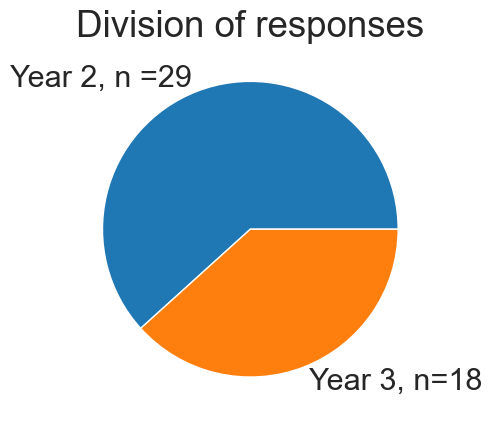

In [6]:
# create pie chart of response division
plt.title("Division of responses")
plt.pie([n2, n3], labels=[f"Year 2, n ={n2}", f"Year 3, n={n3}"])
plt.show()

In [7]:
task = {'interest': '_3', 'difficulty': '_1', 'workload': '_2'}
columns_dict = {}
keys = ['y2_interest', 'y3_interest', 'y2_difficulty', 'y3_difficulty', 'y2_workload', 'y3_workload']
# print(all_columns)
for key in keys:
    useful = [c for c in all_columns if c.endswith(task[key[3:]]) and c.startswith(key[1:3])]
    columns_dict[key] = useful

print(columns_dict)

{'y2_interest': ['2_FS_3', '2_P1_3', '2_P2_3', '2_AILS_3', '2_COPL_3', '2_IAI_3', '2_IR_3', '2_HCI_3', '2_C1_3', '2_LA_3', '2_PT_3', '2_IFR_3', '2_CP_3', '2_B_3'], 'y3_interest': ['3_2AIPT_3', '3_2AM_3', '3_2C2_3', '3_2DM_3', '3_2SIAI_3', '3_2BS_3', '3_2CCN_3', '3_2DL_3', '3_2KR_3', '3_2NLP_3', '3_2PhS_3', '3_2RL_3', '3_2PS2_3', '3_2FP_3'], 'y2_difficulty': ['2_FS_1', '2_P1_1', '2_P2_1', '2_AILS_1', '2_COPL_1', '2_IAI_1', '2_IR_1', '2_HCI_1', '2_C1_1', '2_LA_1', '2_PT_1', '2_IFR_1', '2_CP_1', '2_B_1'], 'y3_difficulty': ['3_2AIPT_1', '3_2AM_1', '3_2C2_1', '3_2DM_1', '3_2SIAI_1', '3_2BS_1', '3_2CCN_1', '3_2DL_1', '3_2KR_1', '3_2NLP_1', '3_2PhS_1', '3_2RL_1', '3_2PS2_1', '3_2FP_1'], 'y2_workload': ['2_FS_2', '2_P1_2', '2_P2_2', '2_AILS_2', '2_COPL_2', '2_IAI_2', '2_IR_2', '2_HCI_2', '2_C1_2', '2_LA_2', '2_PT_2', '2_IFR_2', '2_CP_2', '2_B_2'], 'y3_workload': ['3_2AIPT_2', '3_2AM_2', '3_2C2_2', '3_2DM_2', '3_2SIAI_2', '3_2BS_2', '3_2CCN_2', '3_2DL_2', '3_2KR_2', '3_2NLP_2', '3_2PhS_2', '3_2

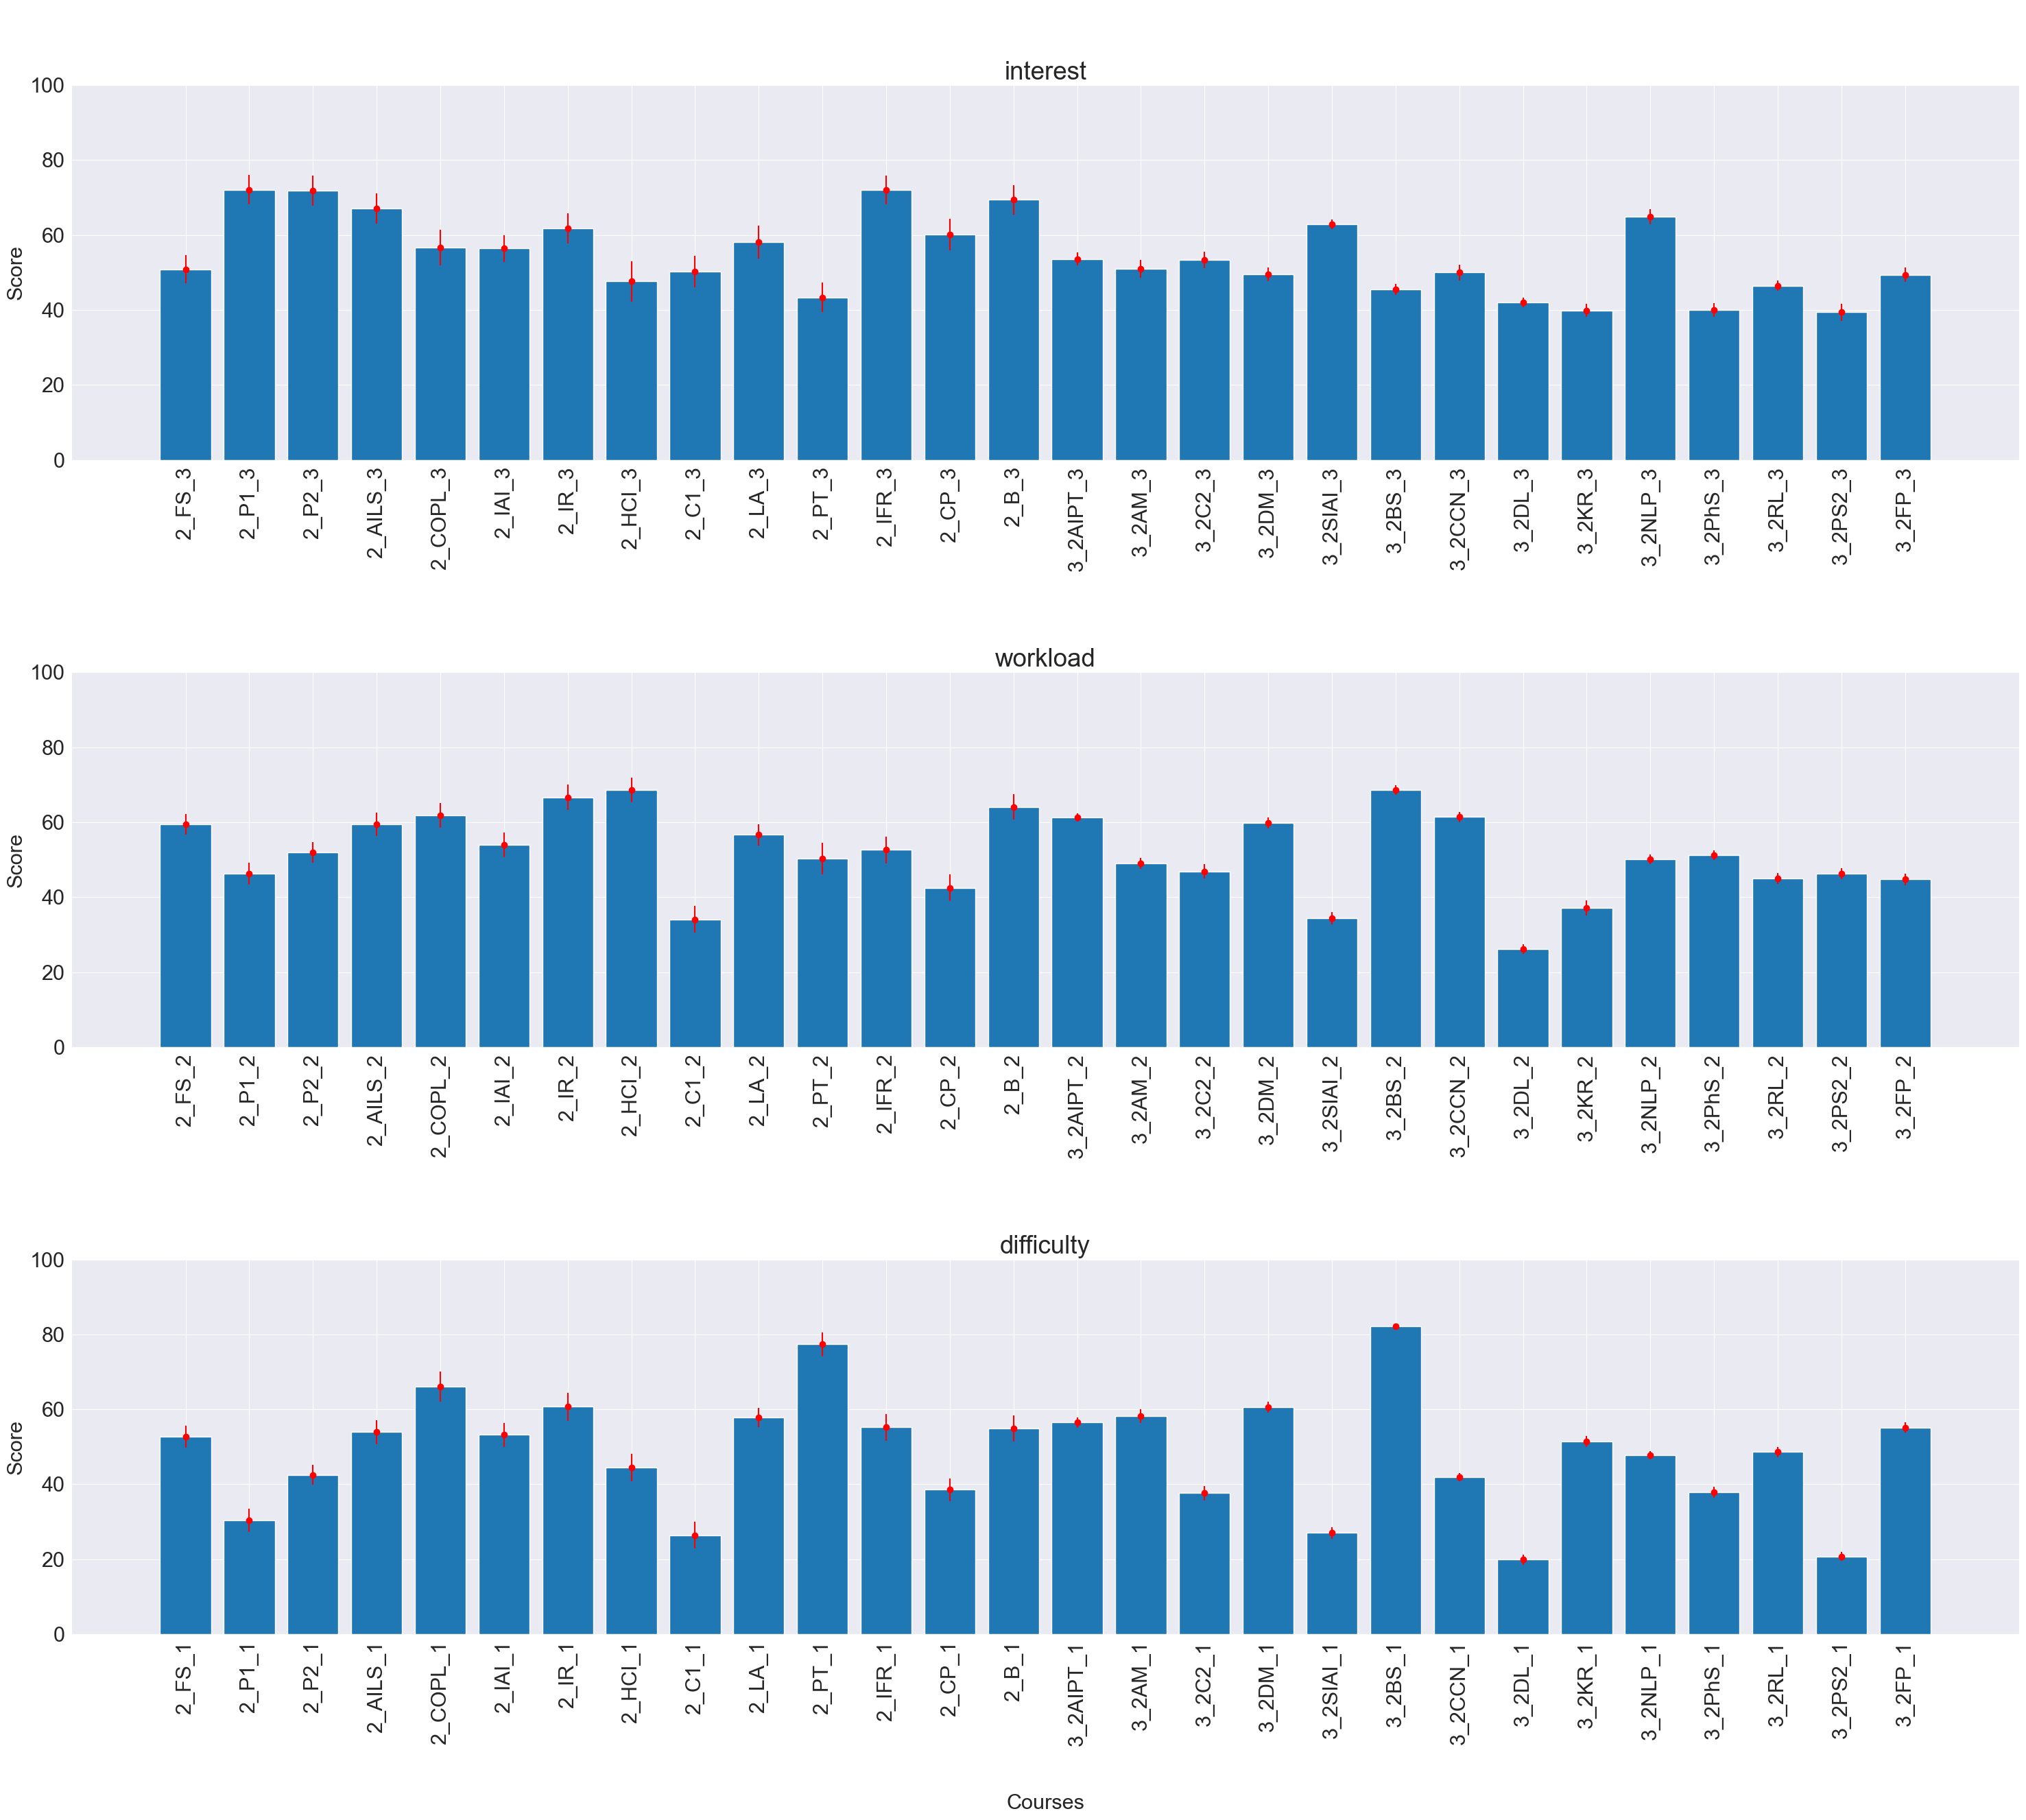

In [8]:
# top n difficult courses
plot_data = [year2_data, year3_data1, year3_data2]
all_cols = data.columns.tolist()

i_int = [c for c in all_cols if c.endswith(task['interest'])]
i_work = [c for c in all_cols if c.endswith(task['workload'])]
i_diff = [c for c in all_cols if c.endswith(task['difficulty'])]

plot_cols = [i_int, i_work, i_diff]
labels = ['interest', 'workload', 'difficulty']

def get_score(cols):
    m = np.mean(data[cols], axis=0)
    s = np.std(data[cols], axis=0) / np.sqrt(len(i_int))  # Sandard error of the mean (SEM)
    return m, s


fig, ax = plt.subplots(3, 1, figsize=(30, 27))

for i, c in enumerate(plot_cols):
    m, s = get_score(c)
    ax[i].bar(c, m)
    ax[i].errorbar(np.arange(len(m)), m, yerr=s, fmt="o", color="r")
    ax[i].tick_params(axis='x', rotation=90)
    ax[i].set_ylim([0, 100])
    ax[i].set_ylabel("Score")
    ax[i].set_title(f"\n\n{labels[i]}")
plt.xlabel("\n\nCourses")
plt.tight_layout()
plt.show()

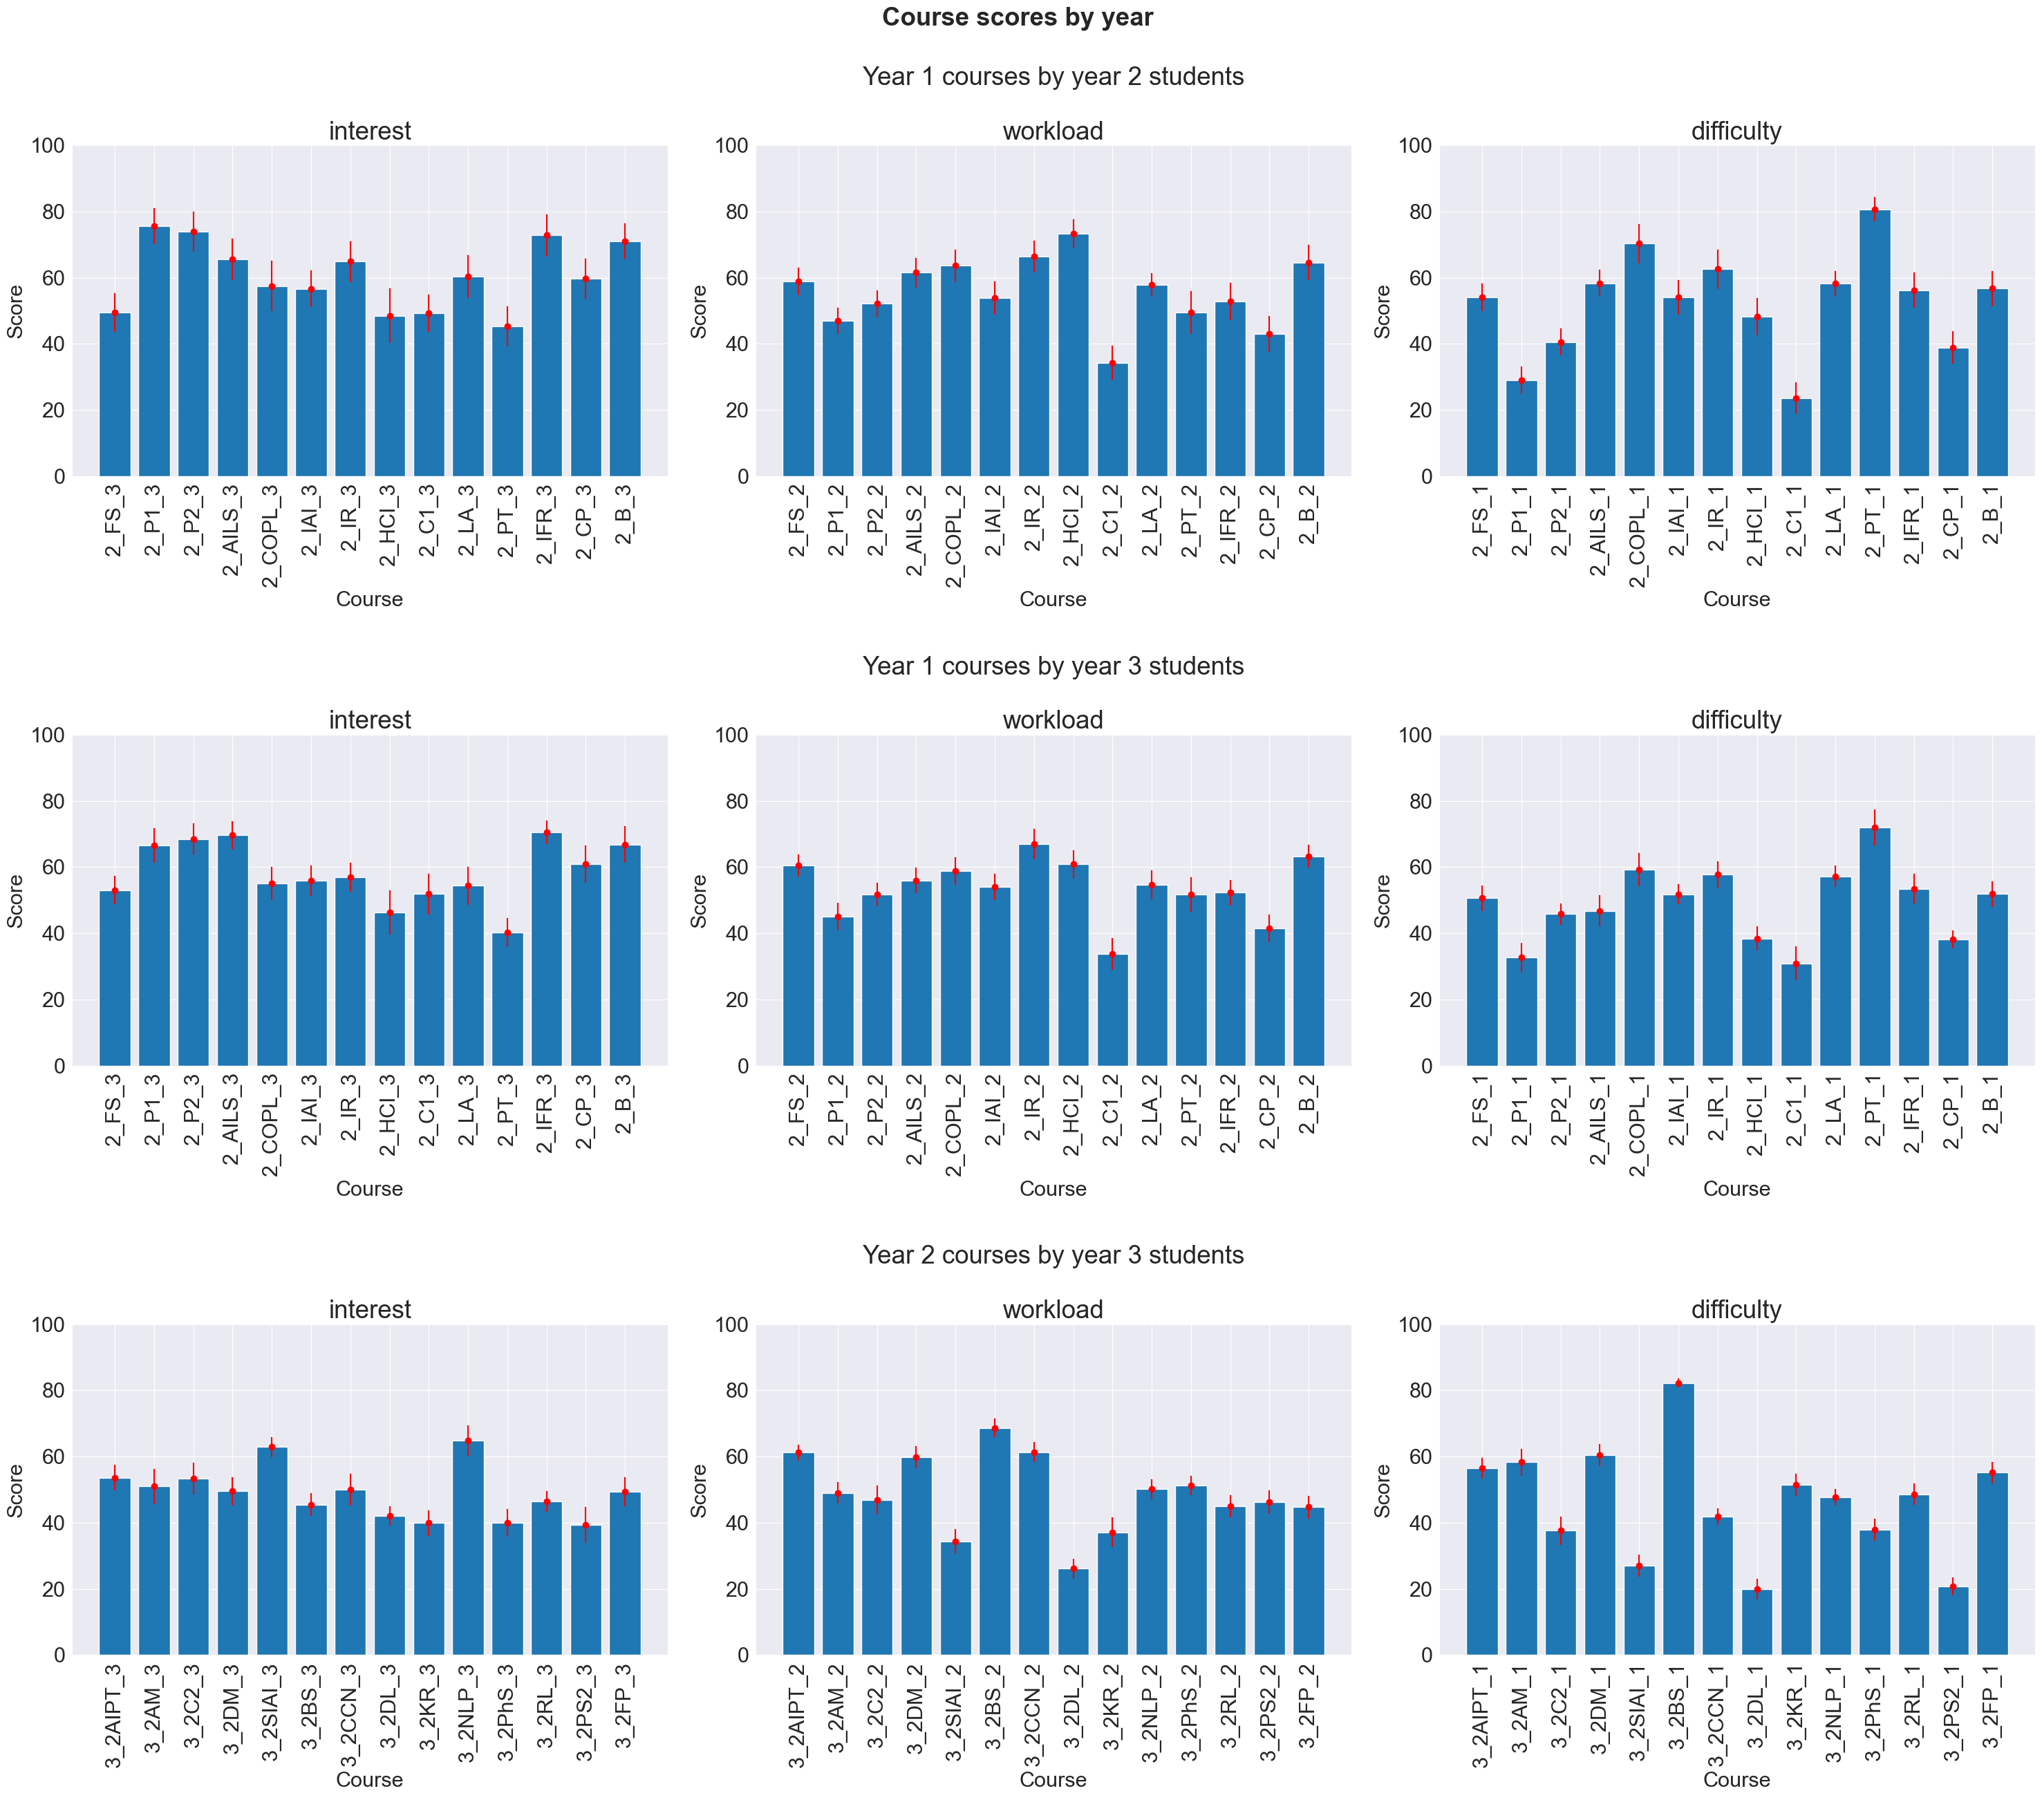

In [9]:
# top n difficult courses
# reworked bar plots
task = {'interest': '_3', 'difficulty': '_1', 'workload': '_2'}

# all_cols = data.columns.tolist()
# i_int = [c for c in all_cols if c.endswith(task['interest'])]
# i_work = [c for c in all_cols if c.endswith(task['workload'])]
# i_diff = [c for c in all_cols if c.endswith(task['difficulty'])]

plot_data = [year2_data, year3_data1, year3_data2]
# plot_cols = [i_int, i_work, i_diff]
plot_labels = ['Year 1 courses by year 2 students', 'Year 1 courses by year 3 students', "Year 2 courses by year 3 students"]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(30, 27))
fig.suptitle(f'Course scores by year \n', fontweight='bold')

for i, d in enumerate(plot_data):
    cols = [c for c in d.columns.tolist()]

    i_int = [c for c in cols if c.endswith(task['interest'])]
    i_work = [c for c in cols if c.endswith(task['workload'])]
    i_diff = [c for c in cols if c.endswith(task['difficulty'])]

    plot_cols = [i_int, i_work, i_diff]
    for j, t in enumerate(labels):
        m = np.mean(d[plot_cols[j]], axis=0)
        s = np.std(d[plot_cols[j]], axis=0) / np.sqrt(len(plot_cols[j]))  # Standard error of the mean (SEM)

        axes[i][j].bar(plot_cols[j], m)
        axes[i][j].errorbar(np.arange(len(m)), m, yerr=s, fmt="o", color="r")
        axes[i][j].set_title(t)
        axes[i][j].set_ylabel('Score')
        axes[i][j].set_xlabel('Course\n')

        axes[i][j].set_ylim((0, 100))
        axes[i][j].tick_params(axis='x', rotation=90)

    axes[i, 1].set_title(plot_labels[i] + '\n\n' + labels[1])
plt.tight_layout()
plt.show()


## Data analysis

[rec system](https://www.geeksforgeeks.org/recommendation-system-in-python/)

In [10]:
# reload data

data = load_and_preprocess()

data;

## Predicting performance

In [11]:
# separate data

all_columns = data.columns.tolist()
print(all_columns)

year2_data = split_data(year2_data, all_columns, 2)
year3_data1, year3_data2 = split_data(year3_data, all_columns, 3)

print(year2_data.shape, year3_data1.shape, year3_data2.shape)
print(year2_data.columns.tolist(), "\n", year3_data2.columns.tolist())

# data

['Q3', '2_NoTake', '2_FS_1', '2_FS_2', '2_FS_3', '2_P1_1', '2_P1_2', '2_P1_3', '2_P2_1', '2_P2_2', '2_P2_3', '2_AILS_1', '2_AILS_2', '2_AILS_3', '2_COPL_1', '2_COPL_2', '2_COPL_3', '2_IAI_1', '2_IAI_2', '2_IAI_3', '2_IR_1', '2_IR_2', '2_IR_3', '2_HCI_1', '2_HCI_2', '2_HCI_3', '2_C1_1', '2_C1_2', '2_C1_3', '2_LA_1', '2_LA_2', '2_LA_3', '2_PT_1', '2_PT_2', '2_PT_3', '2_IFR_1', '2_IFR_2', '2_IFR_3', '2_CP_1', '2_CP_2', '2_CP_3', '2_B_1', '2_B_2', '2_B_3', '2_Retake', '2_Mat', '2_Mat_9_TEXT', '2_Resource', '2_Technique', '2_Technique_8_TEXT', '3_error', '3_2NoTake', '3_2AIPT_1', '3_2AIPT_2', '3_2AIPT_3', '3_2AM_1', '3_2AM_2', '3_2AM_3', '3_2C2_1', '3_2C2_2', '3_2C2_3', '3_2DM_1', '3_2DM_2', '3_2DM_3', '3_2SIAI_1', '3_2SIAI_2', '3_2SIAI_3', '3_2BS_1', '3_2BS_2', '3_2BS_3', '3_2CCN_1', '3_2CCN_2', '3_2CCN_3', '3_2DL_1', '3_2DL_2', '3_2DL_3', '3_2KR_1', '3_2KR_2', '3_2KR_3', '3_2NLP_1', '3_2NLP_2', '3_2NLP_3', '3_2PhS_1', '3_2PhS_2', '3_2PhS_3', '3_2RL_1', '3_2RL_2', '3_2RL_3', '3_2PS2_1', '3

# Predict workload of second semester based on first semester

In [12]:
# Get full data about first years

first_year_data_unscaled = pd.concat([year2_data, year3_data1])
first_year_data_unscaled = first_year_data_unscaled.select_dtypes(include='number')

first_year_data_unscaled

,2_FS_1,2_FS_2,2_FS_3,2_P1_1,2_P1_2,2_P1_3,2_P2_1,2_P2_2,2_P2_3,2_AILS_1,...,2_PT_3,2_IFR_1,2_IFR_2,2_IFR_3,2_CP_1,2_CP_2,2_CP_3,2_B_1,2_B_2,2_B_3
2,75.000000,80.000000,70.000000,50.000000,50.000000,100.000000,50.000000,50.000000,100.000000,70.000000,...,65.000000,80.000000,85.000000,85.000000,50.000000,55.000000,70.000000,80.000000,85.000000,85.000000
4,68.000000,69.000000,60.000000,20.000000,79.000000,85.000000,49.000000,70.000000,74.000000,70.000000,...,46.000000,64.000000,86.000000,81.000000,58.000000,81.000000,93.000000,75.000000,85.000000,100.000000
5,51.000000,30.000000,57.000000,28.000000,50.000000,100.000000,44.000000,36.000000,100.000000,54.000000,...,11.000000,66.000000,35.000000,67.000000,57.000000,53.000000,83.000000,90.000000,83.000000,97.000000
8,40.000000,50.000000,50.000000,19.000000,48.000000,41.000000,50.000000,61.000000,40.000000,57.000000,...,36.000000,67.000000,37.000000,100.000000,73.000000,36.000000,59.000000,73.000000,54.000000,85.000000
9,73.000000,80.000000,29.000000,64.000000,47.000000,86.000000,53.000000,30.000000,86.000000,78.000000,...,60.000000,35.000000,33.000000,100.000000,41.000000,29.000000,29.000000,96.000000,58.000000,13.000000
11,60.000000,70.000000,80.000000,30.000000,70.000000,80.000000,30.000000,70.000000,80.000000,75.000000,...,10.000000,65.000000,50.000000,75.000000,10.000000,15.000000,75.000000,25.000000,50.000000,80.000000
12,62.000000,86.000000,56.000000,55.000000,77.000000,81.000000,57.000000,81.000000,81.000000,71.000000,...,65.000000,61.000000,93.000000,91.000000,57.000000,80.000000,85.000000,50.000000,95.000000,81.000000
13,29.000000,80.000000,42.000000,14.000000,58.000000,96.000000,33.000000,62.000000,96.000000,32.000000,...,100.000000,73.000000,65.000000,95.000000,6.000000,73.000000,28.000000,19.000000,85.000000,40.000000
14,17.000000,51.000000,8.000000,9.000000,50.000000,84.000000,15.000000,48.000000,87.000000,67.000000,...,30.000000,78.000000,83.000000,0.000000,19.000000,50.000000,70.000000,41.000000,74.000000,75.000000
16,77.000000,77.000000,77.000000,50.000000,57.000000,100.000000,61.000000,61.000000,100.000000,61.000000,...,69.000000,79.000000,80.000000,85.000000,49.000000,47.000000,75.000000,68.000000,89.000000,83.000000


In [13]:
train_data, test_data = train_test_split(first_year_data_unscaled, test_size=0.2)

In [14]:

# split train data into 1st sem and 2nd sem
first_year_cols = first_year_data_unscaled.columns.tolist()

# get columns by category
i_int = [c for c in first_year_cols if c.endswith(task['interest'])]
i_work = [c for c in first_year_cols if c.endswith(task['workload'])]
i_diff = [c for c in first_year_cols if c.endswith(task['difficulty'])]

# seperate first semester courses with second semester courses

first_semester = ['2_P1', '2_P2', '2_IAI', '2_C1', '2_LA', '2_PT', '2_IFR', '2_CP']
second_semester = ['2_FS', '2_AILS', '2_COPL', '2_IR', '2_HCI', '2_B']

first_sem_cols = []
second_sem_cols = []

for col in first_year_cols:
    if col[:-2] in first_semester:
        first_sem_cols.append(col)
    elif col[:-2] in second_semester:
        second_sem_cols.append(col)

X_train, y_train = train_data[first_sem_cols], train_data[second_sem_cols]
X_test, y_test = test_data[first_sem_cols], test_data[second_sem_cols]


In [15]:
# y_test

In [16]:
# use standard scaler to prevent distorted results
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train),
                       columns=X_train.columns,
                       index=X_train.index)

X_test = pd.DataFrame(scaler.transform(X_test),
                      columns=X_test.columns,
                      index=X_test.index)
X_train

,2_P1_1,2_P1_2,2_P1_3,2_P2_1,2_P2_2,2_P2_3,2_IAI_1,2_IAI_2,2_IAI_3,2_C1_1,...,2_LA_3,2_PT_1,2_PT_2,2_PT_3,2_IFR_1,2_IFR_2,2_IFR_3,2_CP_1,2_CP_2,2_CP_3
49,0.530302,0.259503,0.524527,0.386116,-0.122570,0.560222,0.626410,-0.221111,-2.295548,-0.791969,...,0.120167,0.168785,-1.370383,-0.149186,1.970004,1.313360,-0.965647,-2.106961,-1.803242,-2.572892
8,-0.789387,0.130770,-1.283007,0.386116,0.596545,-1.278667,1.151993,-0.780408,1.116963,-1.001605,...,0.837205,1.058625,0.207647,-0.356064,0.705349,-0.727680,1.528593,2.173119,-0.404173,-0.076289
16,1.158725,0.710067,1.451467,1.226358,0.596545,1.479667,1.035196,0.711052,1.371628,0.413433,...,1.554243,0.287430,0.781476,1.350681,1.365169,1.581918,0.697180,0.542612,0.187741,0.612429
15,2.541256,2.190491,-1.885518,1.455515,1.577156,-2.427973,-1.475921,-1.526138,-2.397414,-1.158831,...,-1.224279,0.287430,1.020571,-1.493895,-0.174412,0.453975,-0.688509,-1.495521,0.887276,1.258102
51,-0.076575,0.018589,0.159047,-0.183502,0.004442,0.184563,-0.064061,0.025638,0.066844,0.067217,...,0.033253,0.012389,0.080129,0.024780,0.055525,0.112174,-0.025058,-0.165588,-0.056851,-0.028027
55,-1.354968,-0.641625,0.061056,-0.606897,-0.384067,-0.037417,-0.064061,0.025638,0.066844,0.067217,...,0.033253,0.012389,0.080129,0.024780,0.055525,0.112174,-0.025058,-0.165588,-0.056851,-0.028027
44,-0.349491,-1.478386,0.200097,-0.759668,-1.691548,0.422305,1.268789,0.462475,-0.869424,-0.949196,...,1.106094,0.465398,-1.322564,-2.011090,-1.439068,-0.996238,0.530897,0.882301,-1.103707,-0.765007
25,-0.076575,0.018589,0.159047,-0.183502,0.004442,0.184563,-0.064061,0.025638,0.066844,0.067217,...,0.033253,0.012389,0.080129,0.024780,0.055525,0.112174,-0.025058,-0.165588,-0.056851,-0.028027
7,0.153248,-0.319794,-0.634149,0.309730,-0.841685,0.330361,0.042429,-1.091129,-1.480620,-1.158831,...,0.030537,-4.280411,-0.940011,2.023035,-0.779247,0.024282,0.918890,-0.612330,-1.695622,-1.367635
19,0.530302,-0.963456,-1.422048,1.226358,0.204300,-0.497139,0.626410,0.835340,0.760432,1.671244,...,0.254612,0.228108,-0.557458,-0.976699,0.430423,0.615110,0.309187,1.289928,1.156328,-1.755039


## Predictions using a KNN regressor

### K-fold validation combined with KNN regression

In [17]:
# to find best k value

def calc_plot_kfold_knn(X_, y_, str_end, fig, ax):
    useful_cols_X = [c for c in X_.columns.tolist() if c.endswith(str_end)]
    useful_cols_y = [c for c in y_.columns.tolist() if c.endswith(str_end)]

    X = X_[useful_cols_X]
    y = y_[useful_cols_y]

    k_vals = np.arange(1, 15)
    best_k = 0

    # TODO remove random state
    kf_model = KFold(n_splits=4, shuffle=True)

    mse_k = np.zeros(k_vals.shape)
    mse_k_std = np.zeros(k_vals.shape)
    mae_k = np.zeros(k_vals.shape)
    r2_k = np.zeros((k_vals.shape[0], len(second_semester)))

    for i, k in enumerate(k_vals):
        mse = []
        std = []
        mae = []
        r2 = []

        clf = KNeighborsRegressor(n_neighbors=k, weights='distance')
        for train_index, test_index in kf_model.split(X):
            X_train_sub, X_test_sub = X.iloc[train_index], X.iloc[test_index]
            y_train_sub, y_test_sub = y.iloc[train_index], y.iloc[test_index]

            clf.fit(X_train_sub, y_train_sub)
            predictions = clf.predict(X_test_sub)
            # print(f"k: {k}, predicted")

            mse.append(mean_squared_error(y_test_sub, predictions))
            mae.append(mean_absolute_error(y_test_sub, predictions))
            r2.append(r2_score(y_test_sub, predictions, multioutput='raw_values'))

        mse_k[i] = np.mean(mse)
        mse_k_std[i] = np.std(mse)
        mae_k[i] = np.mean(mae)
        r2_k[i] = np.mean(r2, axis=0)
        print(f"k: {k}, mse: {mse_k[i]}, mae: {mae_k[i]}, r2: {r2_k[i]}")
            
        # treshold for best k value
        if k >= 3:
            if (mse_k[i-1] - mse_k[i]) / (mse_k[i-1]) < 0.03 and best_k == 0:
                best_k = i

    # fig, ax = plt.subplots(1,2, figsize=(15,5))

    ax[0].plot(k_vals, mse_k, '-o', label='Mean Squared Error')
    ax[0].plot(best_k, mse_k[best_k - 1], 'ro')
    # ax[0].plot(k_vals, mse_k_std, label='MSE std')
    ax[0].fill_between(k_vals, np.subtract(mse_k, mse_k_std), np.add(mse_k, mse_k_std), alpha=0.2)

    ax[0].set_title('Mean Squared Error')

    ax[1].plot(k_vals, mae_k, label='Mean Absolute Error')

    ax[1].plot(k_vals, r2_k, label=f'R2 score')
    # for l in sub_data.columns.tolist():
    #     ax[1].plot(k_vals, r2_k, label=f'R2:{l}')
    ax[1].set_title('R2 Score and Mean Absolute Error')

    return best_k


k: 1, mse: 548.6233241513925, mae: 14.801284790010282, r2: [-0.43756516 -0.02146016 -0.69002965 -1.39124733  0.02879139  0.2791143 ]
k: 2, mse: 458.6617906216467, mae: 13.663209748529509, r2: [-0.02017141  0.1451421  -0.0075602  -0.5676575  -0.39378495  0.40176913]
k: 3, mse: 412.36890324714295, mae: 13.631392023139869, r2: [ 0.05028594  0.37439754 -0.02711923 -0.06038141  0.13250018  0.40358884]
k: 4, mse: 444.9069583909054, mae: 14.254849291755283, r2: [-0.25148279  0.14169281 -0.06653055 -0.27344861 -0.04087408  0.33436745]
k: 5, mse: 427.8876678646264, mae: 13.935505511753052, r2: [ 0.19586479  0.01916292  0.12631812 -0.21952401  0.00427251  0.14174293]
k: 6, mse: 400.48815311405406, mae: 13.827097968682953, r2: [ 0.01901967  0.13071735  0.16365443 -0.01359514  0.1747691  -0.22373368]
k: 7, mse: 410.37099424422865, mae: 14.014455089492973, r2: [ 0.16962676  0.23320716  0.30310647 -0.34945065  0.01838644 -0.03474748]
k: 8, mse: 408.3099337857673, mae: 13.81975173864476, r2: [ 0.1395

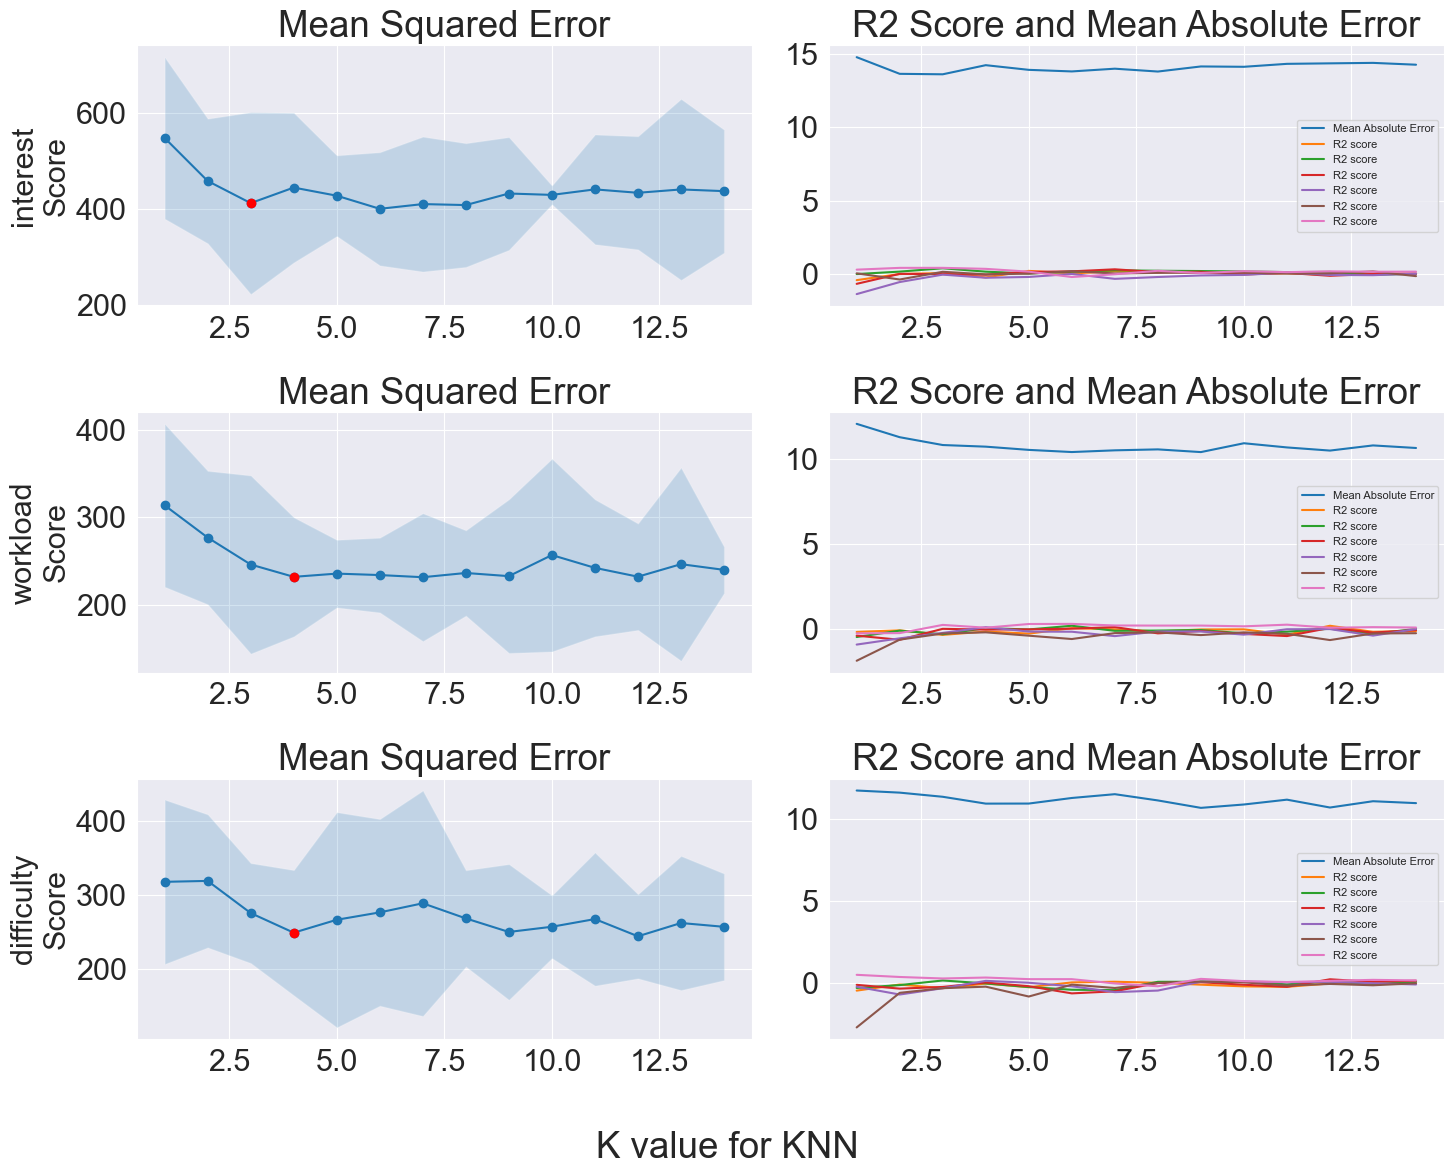

In [18]:
fig, ax = plt.subplots(3, 2, figsize=(15, 12))

labels = ['interest', 'workload', 'difficulty']
k_vals = np.zeros(len(labels))
for i, t in enumerate(labels):
    k_vals[i] = calc_plot_kfold_knn(X_train, y_train, task[labels[i]], fig, ax[i])
    ax[i][1].legend(loc='best')
    ax[i][0].set_ylabel(t + '\nScore')

fig.supxlabel('K value for KNN')
# plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [19]:
# print(f"kvals: {k_vals}")
print(f"Best k-values for KNN: {k_vals} "
      f"for interest, workload, difficulty, respectively")

Best k-values for KNN: [3. 4. 4.] for interest, workload, difficulty, respectively


### Predict performance for test set with calculated k values

In [20]:
y_test

,2_FS_1,2_FS_2,2_FS_3,2_AILS_1,2_AILS_2,2_AILS_3,2_COPL_1,2_COPL_2,2_COPL_3,2_IR_1,2_IR_2,2_IR_3,2_HCI_1,2_HCI_2,2_HCI_3,2_B_1,2_B_2,2_B_3
11,60.000000,70.000000,80.000000,75.000000,80.0,70.000000,90.000000,80.0,30.0,20.000000,40.000000,86.000000,10.000000,35.000000,20.000000,25.000000,50.000000,80.000000
41,58.000000,61.000000,20.000000,34.000000,73.0,51.000000,84.000000,64.0,81.0,100.000000,100.000000,0.000000,75.000000,80.000000,87.000000,64.000000,45.000000,86.000000
2,75.000000,80.000000,70.000000,70.000000,80.0,95.000000,80.000000,80.0,100.0,80.000000,85.000000,100.000000,75.000000,80.000000,80.000000,80.000000,85.000000,85.000000
27,52.756757,59.486486,50.837838,53.914286,59.4,67.142857,66.028571,61.8,56.6,60.676471,66.647059,61.823529,44.441176,68.529412,47.647059,54.909091,64.090909,69.393939
14,17.000000,51.000000,8.000000,67.000000,49.0,53.000000,90.000000,63.0,4.0,18.000000,53.000000,79.000000,53.000000,58.000000,85.000000,41.000000,74.000000,75.000000
17,62.000000,74.000000,67.000000,72.000000,85.0,85.000000,41.000000,51.0,56.0,49.000000,75.000000,67.000000,10.000000,24.000000,5.000000,66.000000,73.000000,71.000000
34,40.000000,40.000000,35.000000,45.000000,55.0,95.000000,1.000000,1.0,1.0,45.000000,45.000000,85.000000,40.000000,55.000000,30.000000,35.000000,44.000000,80.000000
45,36.000000,45.000000,64.000000,19.000000,36.0,89.000000,69.000000,59.0,83.0,50.000000,27.000000,85.000000,17.000000,19.000000,78.000000,18.000000,40.000000,28.000000
13,29.000000,80.000000,42.000000,32.000000,93.0,87.000000,55.000000,64.0,95.0,84.000000,86.000000,59.000000,5.000000,73.000000,18.000000,19.000000,85.000000,40.000000
47,73.000000,61.000000,55.000000,80.000000,67.0,75.000000,81.000000,51.0,51.0,78.000000,64.000000,79.000000,80.000000,83.000000,54.000000,66.000000,55.000000,86.000000


In [21]:
pre_scores = np.zeros(len(labels))

for i, k in enumerate(k_vals):
    clf = KNeighborsRegressor(n_neighbors=int(k), weights='distance')

    useful_cols_X = [c for c in X_test.columns.tolist() if c.endswith(task[labels[i]])]
    useful_cols_y = [c for c in y_test.columns.tolist() if c.endswith(task[labels[i]])]

    clf.fit(X_train[useful_cols_X], y_train[useful_cols_y])
    predictions = clf.predict(X_test[useful_cols_X])
    # print(y_test[useful_cols_y])
    # print(predictions)
    pre_scores[i] = r2_score(y_test[useful_cols_y], predictions)
    print(f"Score for {labels[i]}: {pre_scores[i]}")


Score for interest: 0.023034304606345517
Score for workload: -0.19585177578559235
Score for difficulty: -0.308300029589551


## PCA

In [22]:
X_train

,2_P1_1,2_P1_2,2_P1_3,2_P2_1,2_P2_2,2_P2_3,2_IAI_1,2_IAI_2,2_IAI_3,2_C1_1,...,2_LA_3,2_PT_1,2_PT_2,2_PT_3,2_IFR_1,2_IFR_2,2_IFR_3,2_CP_1,2_CP_2,2_CP_3
49,0.530302,0.259503,0.524527,0.386116,-0.122570,0.560222,0.626410,-0.221111,-2.295548,-0.791969,...,0.120167,0.168785,-1.370383,-0.149186,1.970004,1.313360,-0.965647,-2.106961,-1.803242,-2.572892
8,-0.789387,0.130770,-1.283007,0.386116,0.596545,-1.278667,1.151993,-0.780408,1.116963,-1.001605,...,0.837205,1.058625,0.207647,-0.356064,0.705349,-0.727680,1.528593,2.173119,-0.404173,-0.076289
16,1.158725,0.710067,1.451467,1.226358,0.596545,1.479667,1.035196,0.711052,1.371628,0.413433,...,1.554243,0.287430,0.781476,1.350681,1.365169,1.581918,0.697180,0.542612,0.187741,0.612429
15,2.541256,2.190491,-1.885518,1.455515,1.577156,-2.427973,-1.475921,-1.526138,-2.397414,-1.158831,...,-1.224279,0.287430,1.020571,-1.493895,-0.174412,0.453975,-0.688509,-1.495521,0.887276,1.258102
51,-0.076575,0.018589,0.159047,-0.183502,0.004442,0.184563,-0.064061,0.025638,0.066844,0.067217,...,0.033253,0.012389,0.080129,0.024780,0.055525,0.112174,-0.025058,-0.165588,-0.056851,-0.028027
55,-1.354968,-0.641625,0.061056,-0.606897,-0.384067,-0.037417,-0.064061,0.025638,0.066844,0.067217,...,0.033253,0.012389,0.080129,0.024780,0.055525,0.112174,-0.025058,-0.165588,-0.056851,-0.028027
44,-0.349491,-1.478386,0.200097,-0.759668,-1.691548,0.422305,1.268789,0.462475,-0.869424,-0.949196,...,1.106094,0.465398,-1.322564,-2.011090,-1.439068,-0.996238,0.530897,0.882301,-1.103707,-0.765007
25,-0.076575,0.018589,0.159047,-0.183502,0.004442,0.184563,-0.064061,0.025638,0.066844,0.067217,...,0.033253,0.012389,0.080129,0.024780,0.055525,0.112174,-0.025058,-0.165588,-0.056851,-0.028027
7,0.153248,-0.319794,-0.634149,0.309730,-0.841685,0.330361,0.042429,-1.091129,-1.480620,-1.158831,...,0.030537,-4.280411,-0.940011,2.023035,-0.779247,0.024282,0.918890,-0.612330,-1.695622,-1.367635
19,0.530302,-0.963456,-1.422048,1.226358,0.204300,-0.497139,0.626410,0.835340,0.760432,1.671244,...,0.254612,0.228108,-0.557458,-0.976699,0.430423,0.615110,0.309187,1.289928,1.156328,-1.755039


In [23]:
X_inds = []
y_inds = []

X_train_split = []
y_train_split = []

X_test_split = []
y_test_split = []

for i in range(len(labels)):
    cols = [c for c in X_train.columns.tolist() if c.endswith(task[labels[i]])]
    not_cols = [c for c in y_train.columns.tolist() if c.endswith(task[labels[i]])]
    
    # print(cols, not_cols)
    
    X_inds.append(cols)
    y_inds.append(not_cols)
    
    X_train_split.append(X_train[cols])
    y_train_split.append(y_train[not_cols])
    
    X_test_split.append(X_test[cols])
    y_test_split.append(y_test[not_cols])


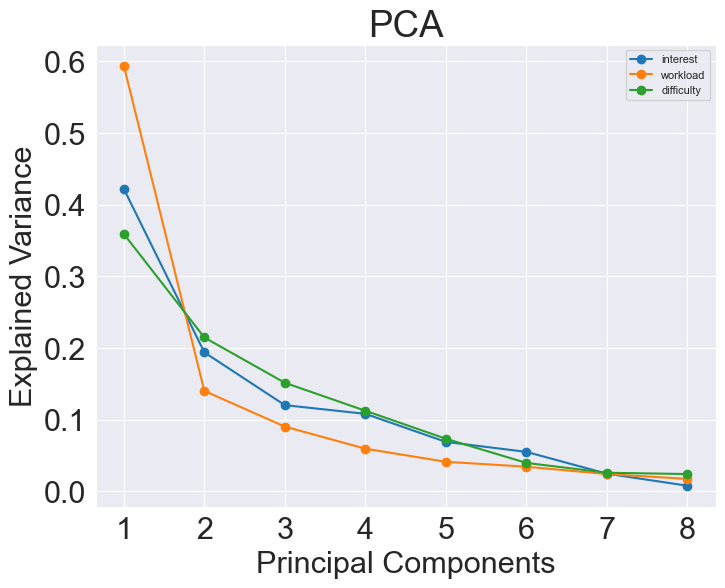

In [24]:
n_components = min(len(X_train_split[0]), len(X_train_split[0].columns))

fig = plt.figure(figsize=(8, 6))

X_pca = []
X_pca_test = []
pcas = []

for i in range(len(X_train_split)):
    pca = PCA(n_components=n_components)
    pcas.append(pca)
    
    X_pca_sub = pca.fit_transform(X_train_split[i])
    X_pca_test_sub = pca.transform(X_test_split[i])
    
    X_pca.append(X_pca_sub)
    X_pca_test.append(X_pca_test_sub)
    
    plt.plot(range(1, n_components + 1), pca.explained_variance_ratio_, '-o')

plt.xticks(range(1, n_components + 1))
plt.legend(['interest', 'workload', 'difficulty'], loc='best')
plt.title('PCA')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.show()

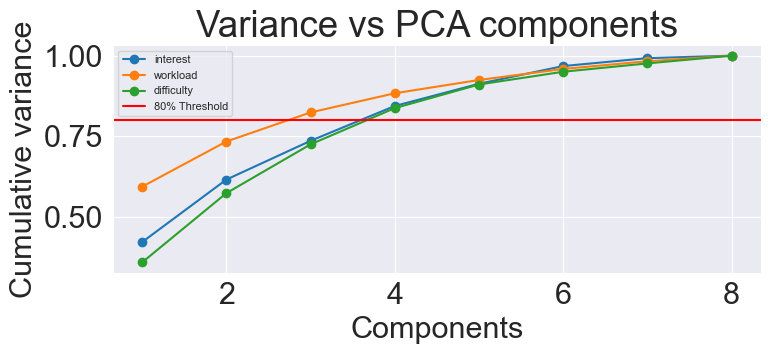

In [25]:
# plot cumulative sum of all variances
# cumulative = np.cumsum(pca.explained_variance_ratio_)

cumsum_pca = []
plt.figure(figsize=(8, 4))

for i in range(len(X_train_split)):
    cumulative = np.cumsum(pcas[i].explained_variance_ratio_)
    cumsum_pca.append(cumulative)
    plt.plot(range(1, len(cumulative) + 1), cumulative, marker='o', label=labels[i])
plt.axhline(y=0.80, color='r', label='80% Threshold')
# plt.legend(['interest', 'workload', 'difficulty'], loc='best')
plt.legend(loc='best')
plt.xlabel('Components')
plt.ylabel('Cumulative variance')
plt.title('Variance vs PCA components')
plt.legend()
plt.tight_layout()
plt.show()


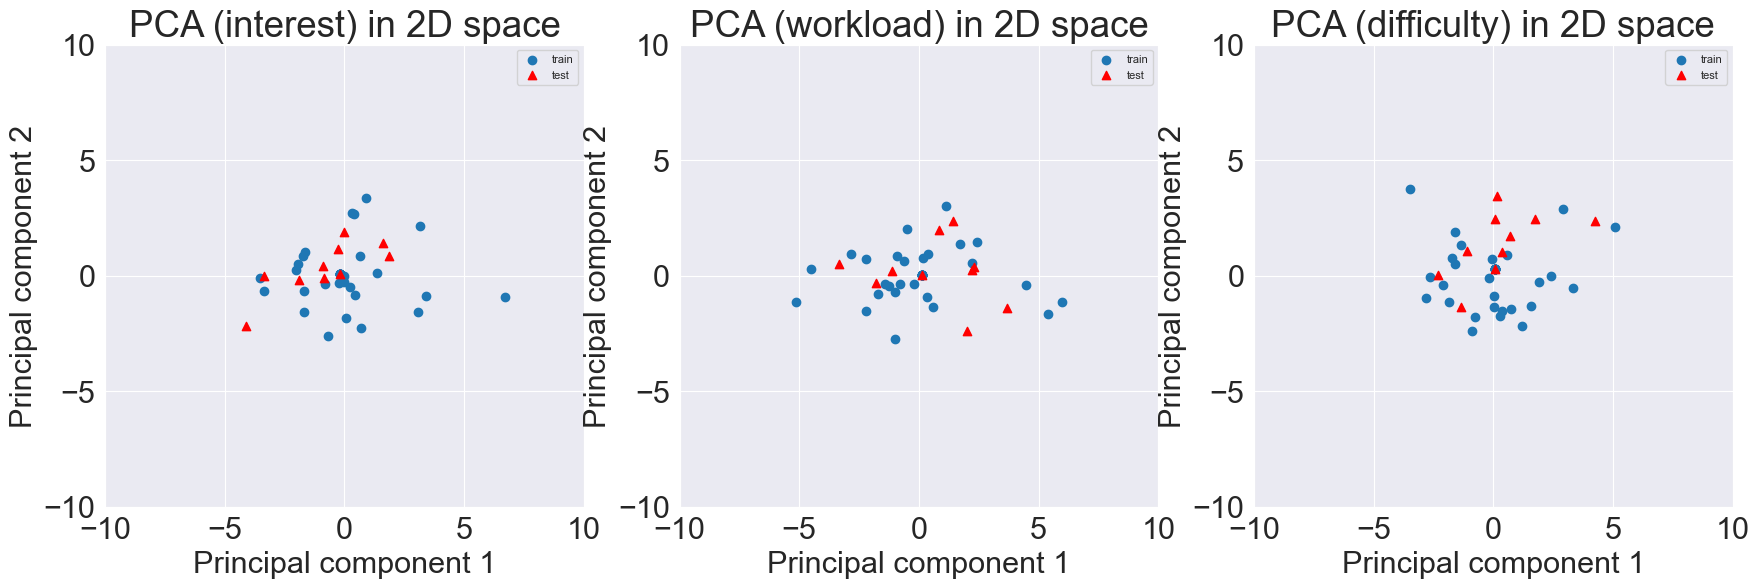

In [26]:
# plot first 2 principal components

# use components that describe at least 80% of the variance
fig, ax = plt.subplots(1, 3, figsize=(21, 6))

X_pca = []
X_pca_test = []

for i in range(len(cumsum_pca)):
    n = np.argmax(cumsum_pca[i] > 0.8) + 1

    pca = PCA(n_components=n)
    X_pca.append(pca.fit_transform(X_train_split[i]))
    X_pca_test.append(pca.transform(X_test_split[i]))
    
    ax[i].scatter(X_pca[-1][:, 0], X_pca[-1][:, 1])
    ax[i].scatter(X_pca_test[-1][:, 0], X_pca_test[-1][:, 1], marker='^', color='r')
    ax[i].legend(['train', 'test'], loc='best')
    ax[i].set_xlabel("Principal component 1")
    ax[i].set_ylabel("Principal component 2")
    ax[i].set_xlim(-10, 10)
    ax[i].set_ylim(-10, 10)
    ax[i].set_title(f"PCA ({labels[i]}) in 2D space")
plt.show()


### KMeans

In [27]:
linked_data_list = []
for i in range(len(X_train_split)):
    linked_components = list(zip(X_pca[i][:, 0], X_pca[i][:, 1]))
    linkage_data = linkage(linked_components, method='ward', metric='euclidean')
    # print(linkage_data)
    linked_data_list.append(linkage_data)

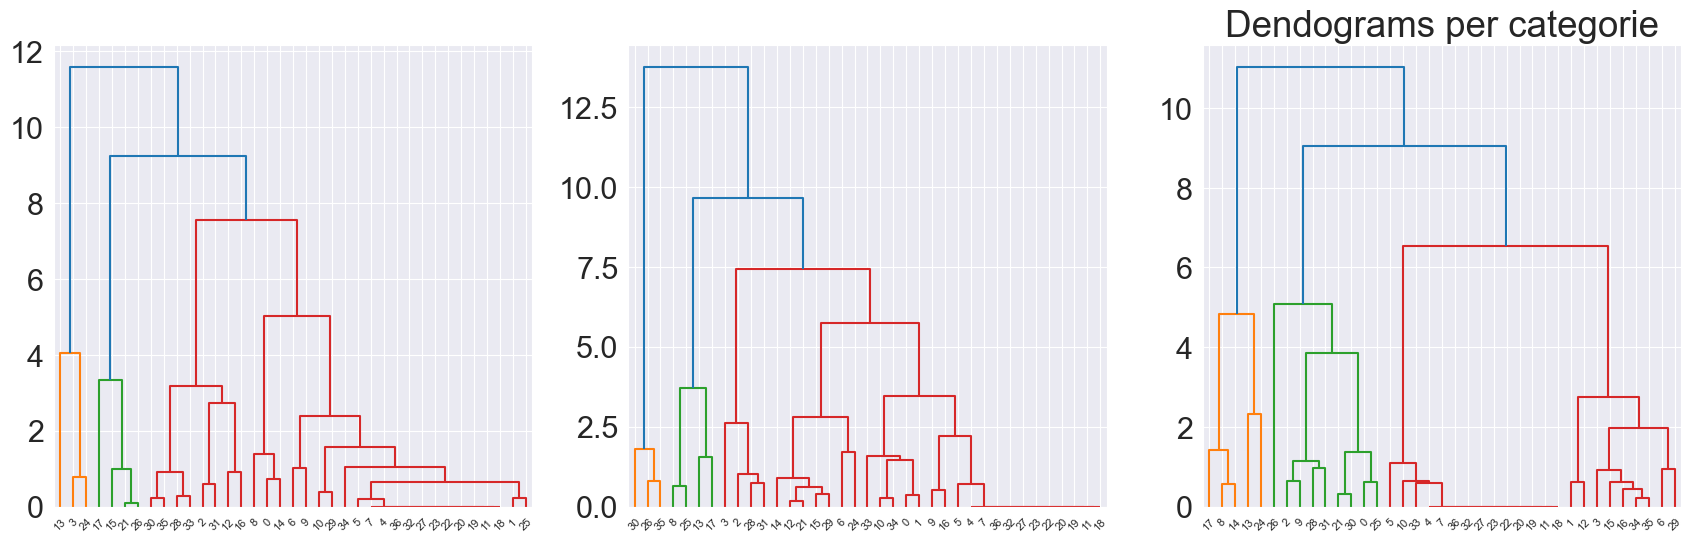

In [28]:
n_clusters = []
cluster_labels = []
cluster_labels_test = []
# print(len(linked_data_list))
kmeans_list = []
centroids = []

# TODO fix whatever
fig, axes = plt.subplots(1, 3, figsize=(21, 6))
plt.title('Dendograms per categorie')
for i in range(len(linked_data_list)):
    dn = dendrogram(linked_data_list[i], ax=axes[i])
    n = len(set(dn['leaves_color_list']))
    n_clusters.append(n)
    # plt.show()
    
    kmeans = KMeans(n_clusters=n)
    kmeans_list.append(kmeans)
    kmeans.fit(X_pca[i])
    cluster_labels.append(kmeans.fit_predict(np.array(X_pca[i])))
    cluster_labels_test.append(kmeans.predict(np.array(X_pca_test[i])))
    centroids.append(kmeans.cluster_centers_)
    
plt.show()
    

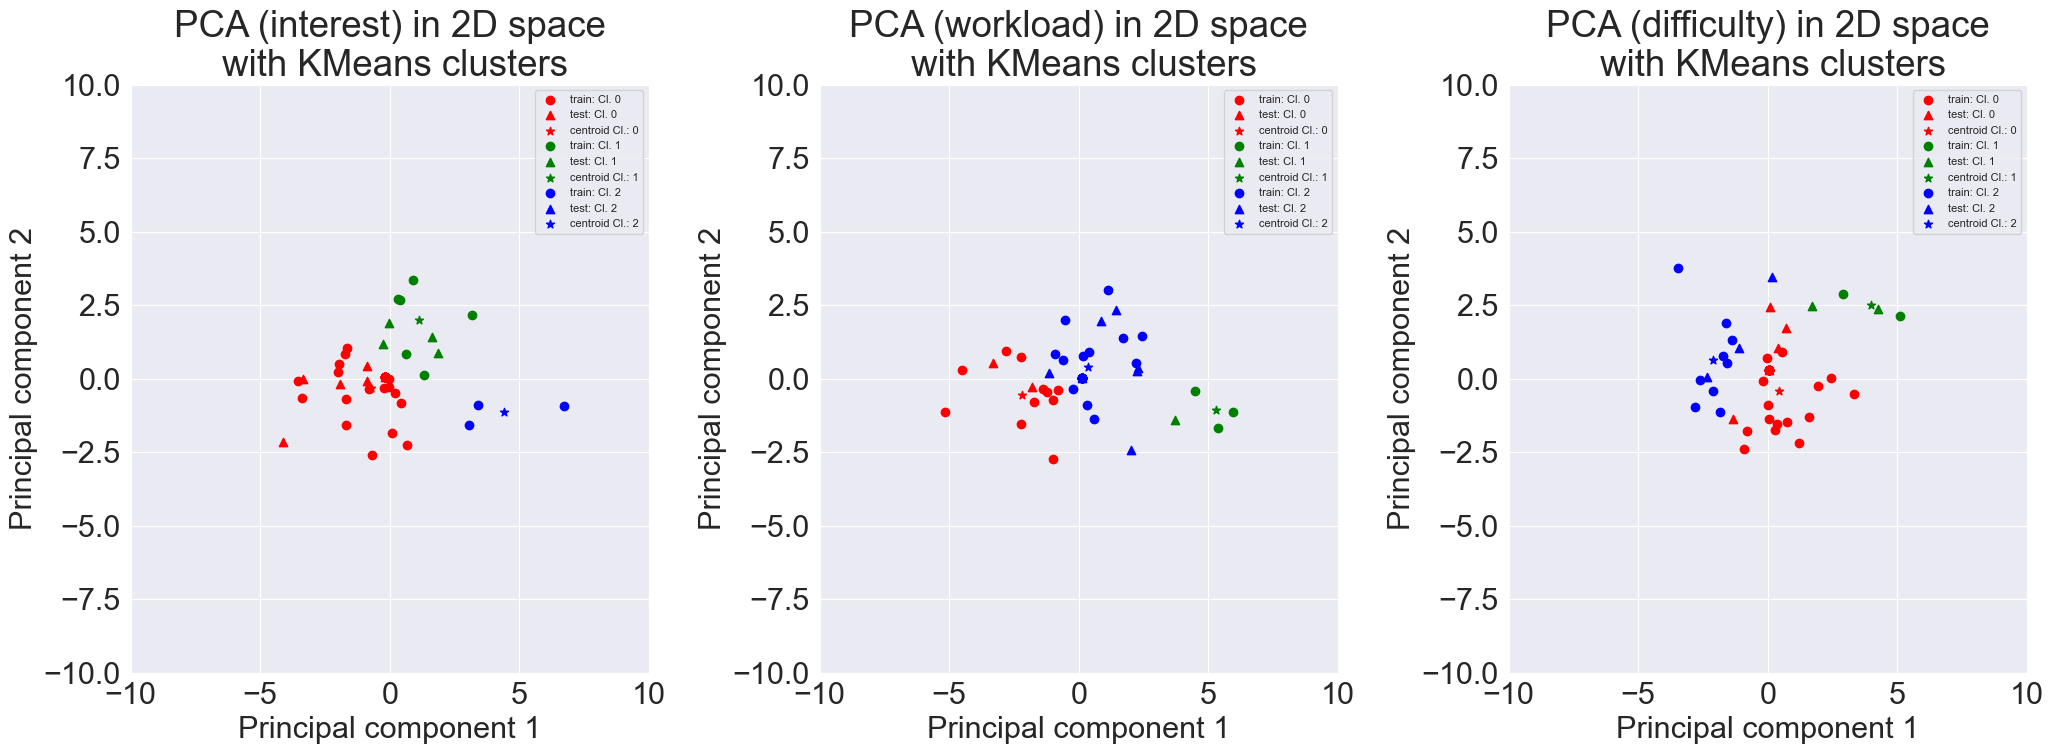

In [29]:
fig, ax = plt.subplots(1, 3, figsize=(21, 8))
colors = ['red', 'green', 'blue', 'orange', 'purple'] 
for i in range(len(X_train_split)):
    for clust in range(n_clusters[i]):
        ax[i].scatter(X_pca[i][cluster_labels[i] == clust, 0], X_pca[i][cluster_labels[i] == clust, 1], label=f"train: Cl. {clust}", color=colors[clust])
        ax[i].scatter(X_pca_test[i][cluster_labels_test[i] == clust, 0], X_pca_test[i][cluster_labels_test[i] == clust, 1], label=f"test: Cl. {clust}", marker='^', color=colors[clust])
        ax[i].scatter(centroids[i][clust,0], centroids[i][clust,1], marker='*', label=f"centroid Cl.: {clust}", color=colors[clust])  
    ax[i].set_xlabel("Principal component 1")
    ax[i].set_ylabel("Principal component 2")
    ax[i].set_xlim(-10, 10)
    ax[i].set_ylim(-10, 10)
    ax[i].set_title(f"PCA ({labels[i]}) in 2D space\n with KMeans clusters")
    ax[i].legend()
    
# ax[i].scatter(X_pca[-1][:, 0], X_pca[-1][:, 1])
plt.tight_layout()
plt.legend()
plt.show()

In [30]:
# add cluster labels to pca values

X_train_final = []
X_test_final = []

for i in range(len(X_pca)):
    X_train_final.append(np.hstack((X_pca[i], cluster_labels[i].reshape(-1, 1))))
    X_test_final.append(np.hstack((X_pca_test[i], cluster_labels_test[i].reshape(-1, 1))))

## Repeat KNN after PCA and KMeans

### Using interest to predict interest, workload to workload etc

In [31]:
after = np.zeros(len(labels))
predictions = []
for i, k in enumerate(k_vals):
    clf = KNeighborsRegressor(n_neighbors=int(k), weights='distance')

    # X = test_data[labels[i]]
    useful_cols_X = [c for c in X_test_split[i].columns.tolist() if c.endswith(task[labels[i]])]
    useful_cols_y = [c for c in y_test_split[i].columns.tolist() if c.endswith(task[labels[i]])]
    
    clf.fit(X_train_final[i], y_train_split[i][useful_cols_y])
    predictions.append(clf.predict(X_test_final[i]))
    
    after[i] = r2_score(y_test_split[i][useful_cols_y], predictions[-1])
    print(f"Score for {labels[i]}: {after[i]}")
    # break

Score for interest: -0.030851607892211492
Score for workload: -0.22645419464553
Score for difficulty: -0.06405611626180162


In [32]:
print("Comparitive scoring (before vs after PCA & KMeans)")
for i in range(len(after)):
    print(f"Score for {labels[i]}: {pre_scores[i]}, {after[i]}")


Comparitive scoring (before vs after PCA & KMeans)
Score for interest: 0.023034304606345517, -0.030851607892211492
Score for workload: -0.19585177578559235, -0.22645419464553
Score for difficulty: -0.308300029589551, -0.06405611626180162


#### Calculate within cluster r2 scores

In [33]:
for i in range(len(labels)):
    print(f"Score for {labels[i]}: ")
    for clust in range(n_clusters[i]):
        d = y_test_split[i]
        
        y_cluster_true = d.iloc[cluster_labels_test[i] == clust]
        y_cluster_pred = predictions[i][cluster_labels_test[i] == clust]
        
        try:
            r2_cluster = r2_score(y_cluster_true, y_cluster_pred)
        except ValueError:
            r2_cluster = np.nan
        print(f"r2 score for cluster {clust}: {r2_cluster}")
    print()

Score for interest: 
r2 score for cluster 0: 0.2141201126047564
r2 score for cluster 1: -7.302382630113712
r2 score for cluster 2: nan

Score for workload: 
r2 score for cluster 0: -7.864990687450948
r2 score for cluster 1: nan
r2 score for cluster 2: -0.3608210933074119

Score for difficulty: 
r2 score for cluster 0: -0.31661856451849146
r2 score for cluster 1: -7.734305667901658
r2 score for cluster 2: -2.012854487542347



#### Compare test points to predicted points

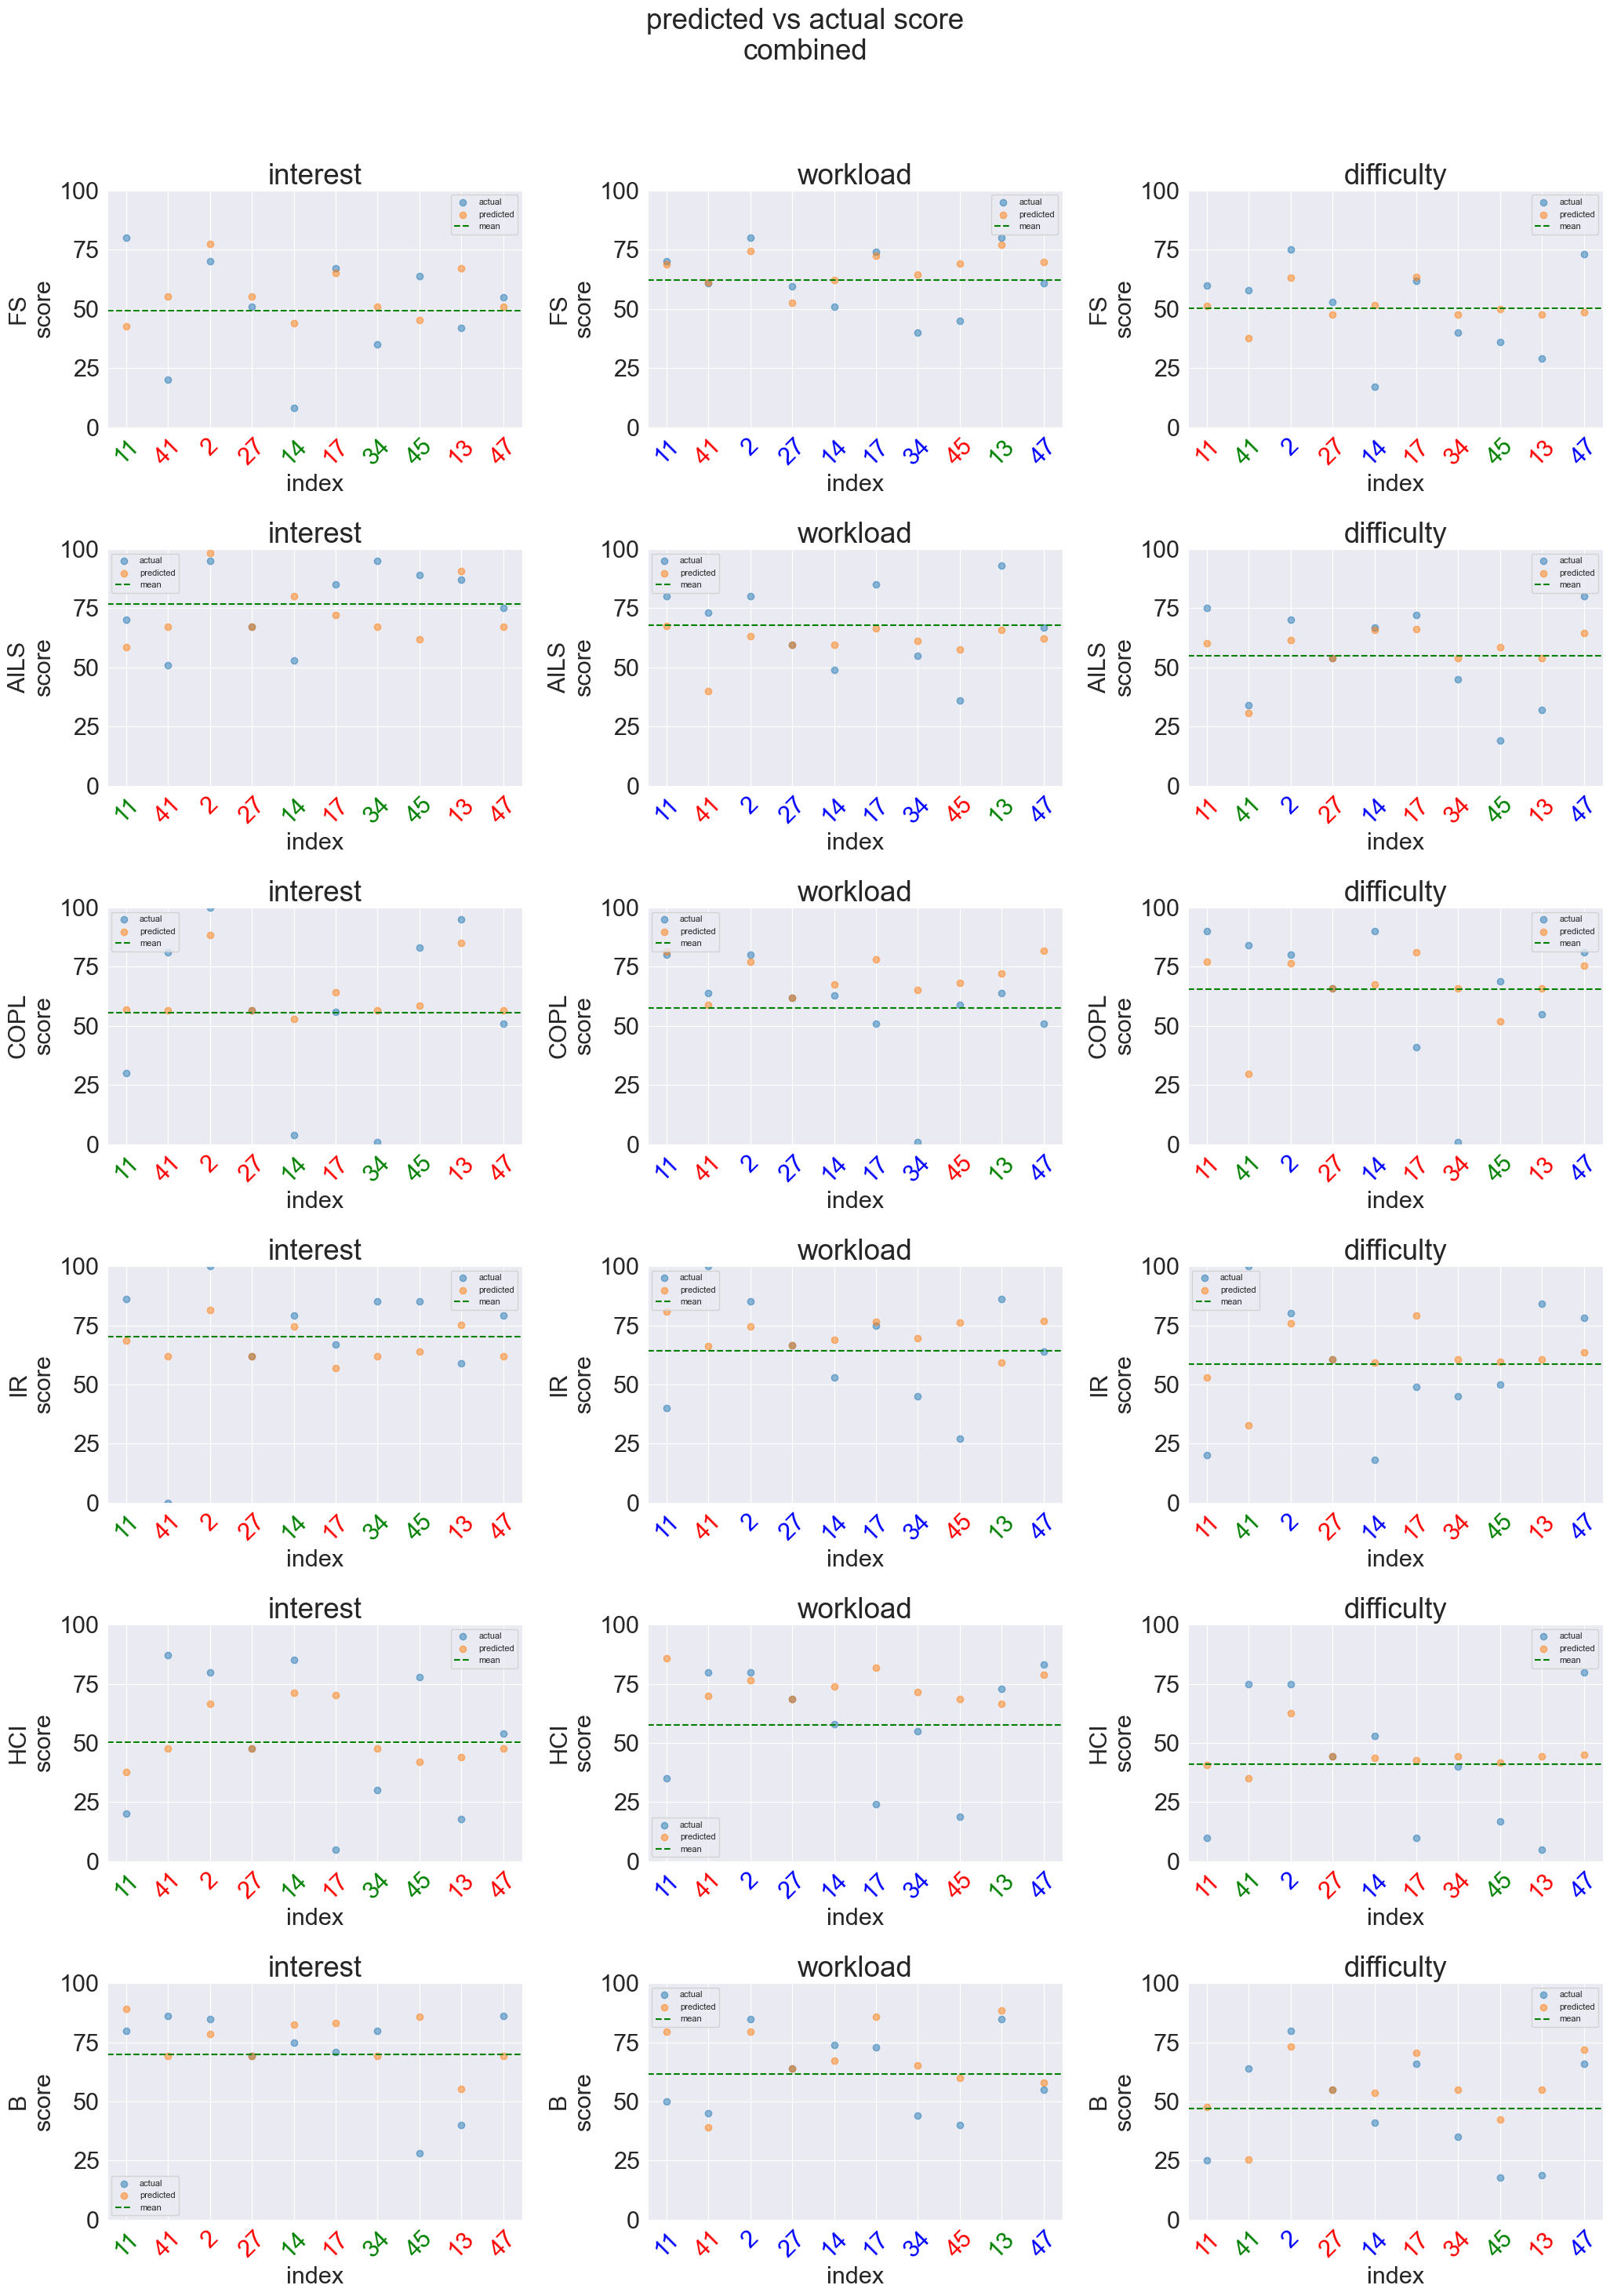

In [34]:
# plot predicted point compared to actual points

fig, axes = plt.subplots(6, 3, figsize=(21, 30))
x = np.arange(y_test.shape[0])
x_ticks = y_test.index

fig.suptitle('predicted vs actual score\ncombined\n\n\n')

for i in range(len(predictions)):
    useful_cols_y = [c for c in y_test_split[i].columns.tolist() if c.endswith(task[labels[i]])]
    for j in range(len(useful_cols_y)):
        row =  y_test_split[i][useful_cols_y[j]]
        axes[j,i].scatter(x,row, label='actual', alpha=0.5)
        axes[j,i].scatter(x, predictions[i][:, j], label='predicted', alpha=0.5)
        axes[j,i].axhline(y=np.mean(row), color='g', label='mean', linestyle='--')
        axes[j,i].set_ylim(0,100)
        axes[j,i].set_title(f'{labels[i]}')
        axes[j,i].legend()
        
        # Optional: show the real test indices as tick labels
        axes[j,i].set_xticks(x)  # only label every 5th to avoid clutter
        axes[j,i].set_xticklabels(x_ticks, rotation=45)
        axes[j,i].set_xlabel('index')
        axes[j,i].set_ylabel(f"{useful_cols_y[j][2:-2]}\nscore")
        
        for ind, tick in enumerate(axes[j,i].get_xticklabels()):
            tick.set_color(colors[cluster_labels_test[i][ind]])


plt.tight_layout()
plt.show()

### Using a combined model of all 3 actegories to predict interest, workload and difficulty

In [35]:
X_train

,2_P1_1,2_P1_2,2_P1_3,2_P2_1,2_P2_2,2_P2_3,2_IAI_1,2_IAI_2,2_IAI_3,2_C1_1,...,2_LA_3,2_PT_1,2_PT_2,2_PT_3,2_IFR_1,2_IFR_2,2_IFR_3,2_CP_1,2_CP_2,2_CP_3
49,0.530302,0.259503,0.524527,0.386116,-0.122570,0.560222,0.626410,-0.221111,-2.295548,-0.791969,...,0.120167,0.168785,-1.370383,-0.149186,1.970004,1.313360,-0.965647,-2.106961,-1.803242,-2.572892
8,-0.789387,0.130770,-1.283007,0.386116,0.596545,-1.278667,1.151993,-0.780408,1.116963,-1.001605,...,0.837205,1.058625,0.207647,-0.356064,0.705349,-0.727680,1.528593,2.173119,-0.404173,-0.076289
16,1.158725,0.710067,1.451467,1.226358,0.596545,1.479667,1.035196,0.711052,1.371628,0.413433,...,1.554243,0.287430,0.781476,1.350681,1.365169,1.581918,0.697180,0.542612,0.187741,0.612429
15,2.541256,2.190491,-1.885518,1.455515,1.577156,-2.427973,-1.475921,-1.526138,-2.397414,-1.158831,...,-1.224279,0.287430,1.020571,-1.493895,-0.174412,0.453975,-0.688509,-1.495521,0.887276,1.258102
51,-0.076575,0.018589,0.159047,-0.183502,0.004442,0.184563,-0.064061,0.025638,0.066844,0.067217,...,0.033253,0.012389,0.080129,0.024780,0.055525,0.112174,-0.025058,-0.165588,-0.056851,-0.028027
55,-1.354968,-0.641625,0.061056,-0.606897,-0.384067,-0.037417,-0.064061,0.025638,0.066844,0.067217,...,0.033253,0.012389,0.080129,0.024780,0.055525,0.112174,-0.025058,-0.165588,-0.056851,-0.028027
44,-0.349491,-1.478386,0.200097,-0.759668,-1.691548,0.422305,1.268789,0.462475,-0.869424,-0.949196,...,1.106094,0.465398,-1.322564,-2.011090,-1.439068,-0.996238,0.530897,0.882301,-1.103707,-0.765007
25,-0.076575,0.018589,0.159047,-0.183502,0.004442,0.184563,-0.064061,0.025638,0.066844,0.067217,...,0.033253,0.012389,0.080129,0.024780,0.055525,0.112174,-0.025058,-0.165588,-0.056851,-0.028027
7,0.153248,-0.319794,-0.634149,0.309730,-0.841685,0.330361,0.042429,-1.091129,-1.480620,-1.158831,...,0.030537,-4.280411,-0.940011,2.023035,-0.779247,0.024282,0.918890,-0.612330,-1.695622,-1.367635
19,0.530302,-0.963456,-1.422048,1.226358,0.204300,-0.497139,0.626410,0.835340,0.760432,1.671244,...,0.254612,0.228108,-0.557458,-0.976699,0.430423,0.615110,0.309187,1.289928,1.156328,-1.755039


In [36]:
n_components = len(X_train.columns.tolist())

pca = PCA(n_components=n_components)
X_pca_comb = pca.fit_transform(X_train)
X_pca_test_comb = pca.transform(X_test)

In [37]:
cumulative = np.cumsum(pca.explained_variance_ratio_)

n_components = np.argmax(cumulative > 0.8) + 1 
pca = PCA(n_components=n_components)
X_pca_comb = pca.fit_transform(X_train)

X_pca_test_comb = pca.transform(X_test)

In [38]:
# apply KMeans
linked_components = list(zip(X_pca_comb[:, 0], X_pca_comb[:, 1]))
linkage_data = linkage(linked_components, method='ward', metric='euclidean')

Number of clusters: 3


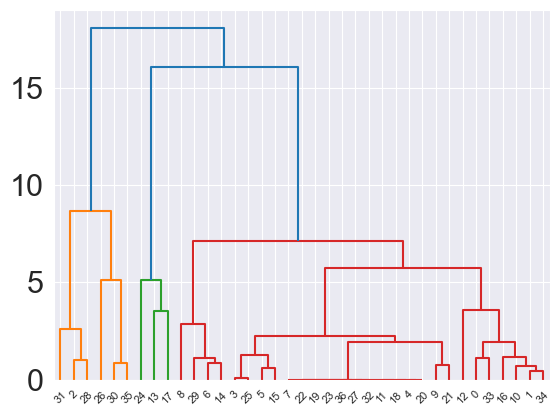

In [39]:
n_clusters = len(set(dendrogram(linkage_data)['leaves_color_list']))

print(f"Number of clusters: {n_clusters}")
kmeans = KMeans(n_clusters=n_clusters)
cluster_labels = kmeans.fit_predict(X_pca_comb)
cluster_labels_test = kmeans.predict(X_pca_test_comb)
centre = kmeans.cluster_centers_

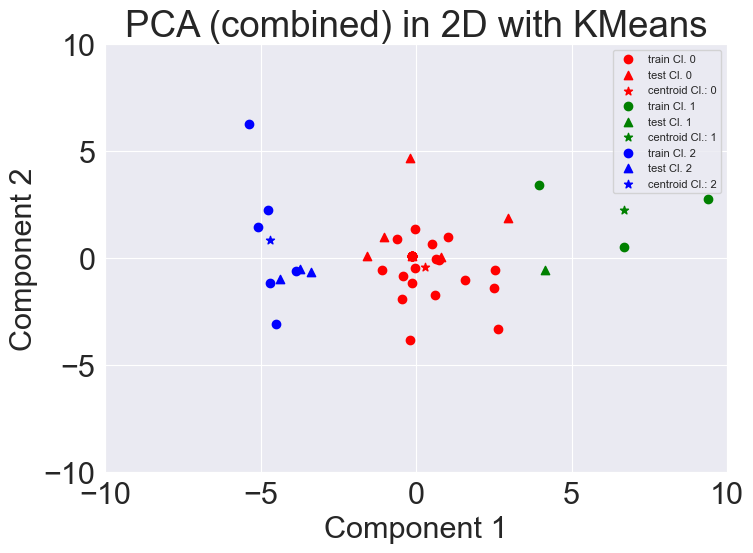

In [40]:
plt.figure(figsize=(8, 6))
for clust in range(n_clusters):
    plt.scatter(X_pca_comb[cluster_labels == clust, 0], X_pca_comb[cluster_labels == clust, 1], label=f"train Cl. {clust}",color=colors[clust])
    plt.scatter(X_pca_test_comb[cluster_labels_test == clust, 0], X_pca_test_comb[cluster_labels_test == clust, 1], label=f"test Cl. {clust}", marker='^', color=colors[clust])
    plt.scatter(centre[clust,0], centre[clust,1], marker='*', label=f"centroid Cl.: {clust}", color=colors[clust])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA (combined) in 2D with KMeans')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.tight_layout()
plt.legend()
plt.show()

In [41]:
X_train_final = np.hstack((X_pca_comb, cluster_labels.reshape(-1, 1)))
X_test_final = np.hstack((X_pca_test_comb, cluster_labels_test.reshape(-1, 1)))

In [42]:
# after = np.zeros(len(labels))
# for i, k in enumerate(k_vals):
k = int(np.mean(k_vals))
clf = KNeighborsRegressor(n_neighbors=k, weights='distance')

# X = test_data[labels[i]]
# useful_cols_X = [c for c in X_test.columns.tolist() if c.endswith(task[labels[i]])]
# useful_cols_y = [c for c in y_test.columns.tolist() if c.endswith(task[labels[i]])]

clf.fit(X_train_final, y_train)
predictions = clf.predict(X_test_final)
score = r2_score(predictions, y_test)
print(f"Score for combined prediction: {score}")

Score for combined prediction: -7.96802726206307


In [43]:

for clust in range(n_clusters):
    d = y_test
    y_cluster_true = d.iloc[cluster_labels_test == clust]
    y_cluster_pred = predictions[cluster_labels_test == clust]
    # print(y_cluster_true) 
    # print(y_cluster_pred)
    try:
        r2_cluster = r2_score(y_cluster_true, y_cluster_pred)
    except ValueError:
        r2_cluster = np.nan
    print(f"r2 score for cluster {clust}: {r2_cluster}")
print()

r2 score for cluster 0: -0.7149040946434985
r2 score for cluster 1: nan
r2 score for cluster 2: -2.0843310486723867



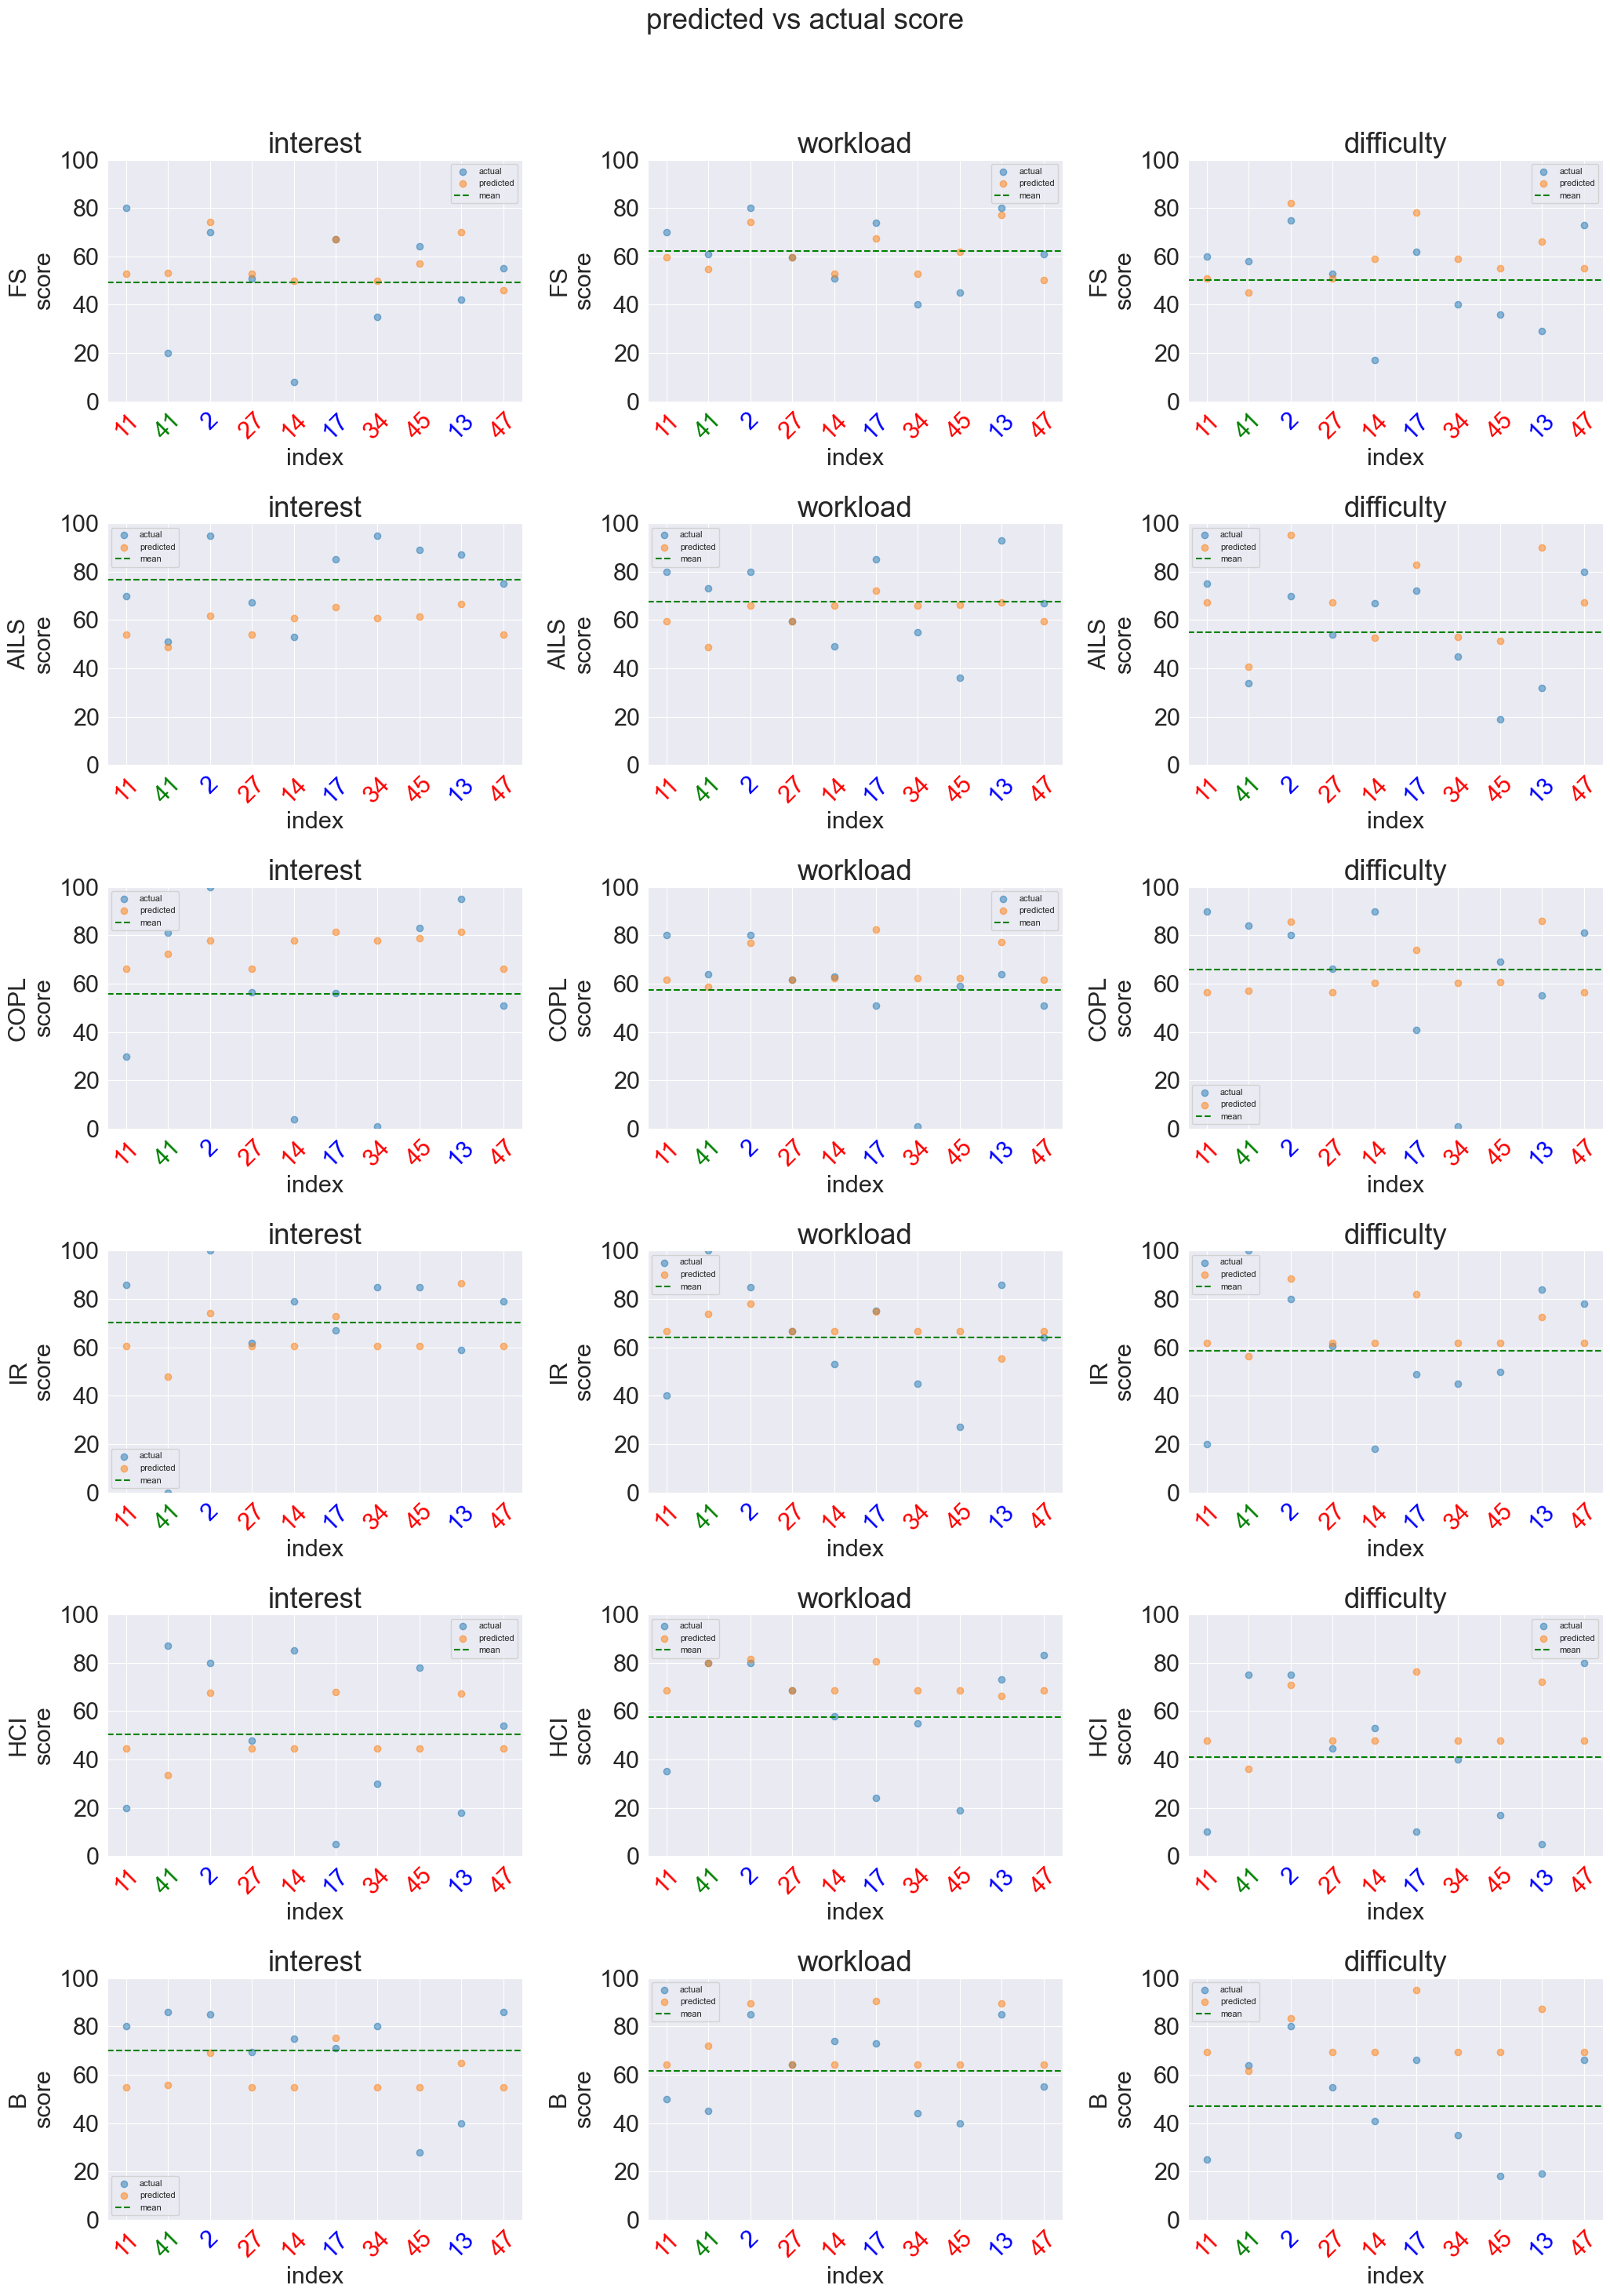

In [44]:
# plot predicted point compared to actual points

fig, axes = plt.subplots(6, 3, figsize=(21, 30))
x = np.arange(y_test.shape[0])
x_ticks = y_test.index
# print(predictions)
fig.suptitle('predicted vs actual score\n\n\n')

for i in range(len(labels)):
    useful_cols_y = [c for c in y_test.columns.tolist() if c.endswith(task[labels[i]])]
    preds = predictions[:, i::3]
    
    for j in range(len(useful_cols_y)):
        row =  y_test[useful_cols_y[j]]
        axes[j,i].scatter(x,row, label='actual', alpha=0.5)
        axes[j,i].scatter(x, preds[:,j], label='predicted', alpha=0.5)
        axes[j,i].axhline(y=np.mean(row), color='g', label='mean', linestyle='--')
        axes[j,i].set_ylim(0,100)
        axes[j,i].set_title(f'{labels[i]}')
        axes[j,i].legend()
        
        # Optional: show the real test indices as tick labels
        axes[j,i].set_xticks(x)  # only label every 5th to avoid clutter
        axes[j,i].set_xticklabels(x_ticks, rotation=45)
        axes[j,i].set_xlabel('index')
        axes[j,i].set_ylabel(f"{useful_cols_y[j][2:-2]}\nscore")
    
        for ind, tick in enumerate(axes[j,i].get_xticklabels()):
            tick.set_color(colors[cluster_labels_test[ind]])


plt.tight_layout()
plt.show()